## Final Project Submission

Please fill out:
* Student name: Mays Alkhwitar
* Student pace: self paced 
* Scheduled project review date/time: 10/3/2022
* Instructor name: Mark Barbour
* Blog post URL:https://github.com/maysasaad/dsc-phase-2-project-v2-3


# Home Sales Prices

![images.jpg](data/image/images.jpg)

# Overview

In this project, we'll perform multiple linear regression analysis and report the findings of the final model, including both predictive model performance metrics and interpretation of fitted model parameters.

# Business Understanding

The goal of this project is to develop a pricing algorithm to help real estate agents
providing advice to homeowners about how home renovations might increase the estimated value of their homes, and by what amount.

The main purpose of this algorithm is predictive, meaning that uses multiple linear regression modeling to predict how sales prices in King County increase based on home features.

#  Data Understanding
This project uses the King County House Sales dataset, found in kc_house_data.csv in the data folder.
Includes  two types of variables :

1-Dependent variable (Home Prices).

2-Independent variables like (Number of bedrooms, Number of bathrooms, Number of floors in the house, condition, grade, ext)
for 21,597 homes in King County,Washington sold in 2014-2015

# Data Preparation

## Importing the dataset
Let's start by importing the dataset kc_house_data  from csv file into a pandas dataframe using pandas read_csv().

In [1]:
# import some libraries for read and visualize data.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import seaborn as sns

In [2]:
# Loading data from csv file  to a data frame
# Display the top five rows of the data frame by using .head() method

house = pd.read_csv('data/kc_house_data.csv')
house

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,NO,NONE,...,8 Good,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,NO,NONE,...,8 Good,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,NO,NONE,...,7 Average,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,NONE,...,8 Good,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


House data frame contains 21 columns , we will pick some of them for our analizing.

We will visualize the relationship between homes prices and homes locations

(array([47.1, 47.2, 47.3, 47.4, 47.5, 47.6, 47.7, 47.8, 47.9]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

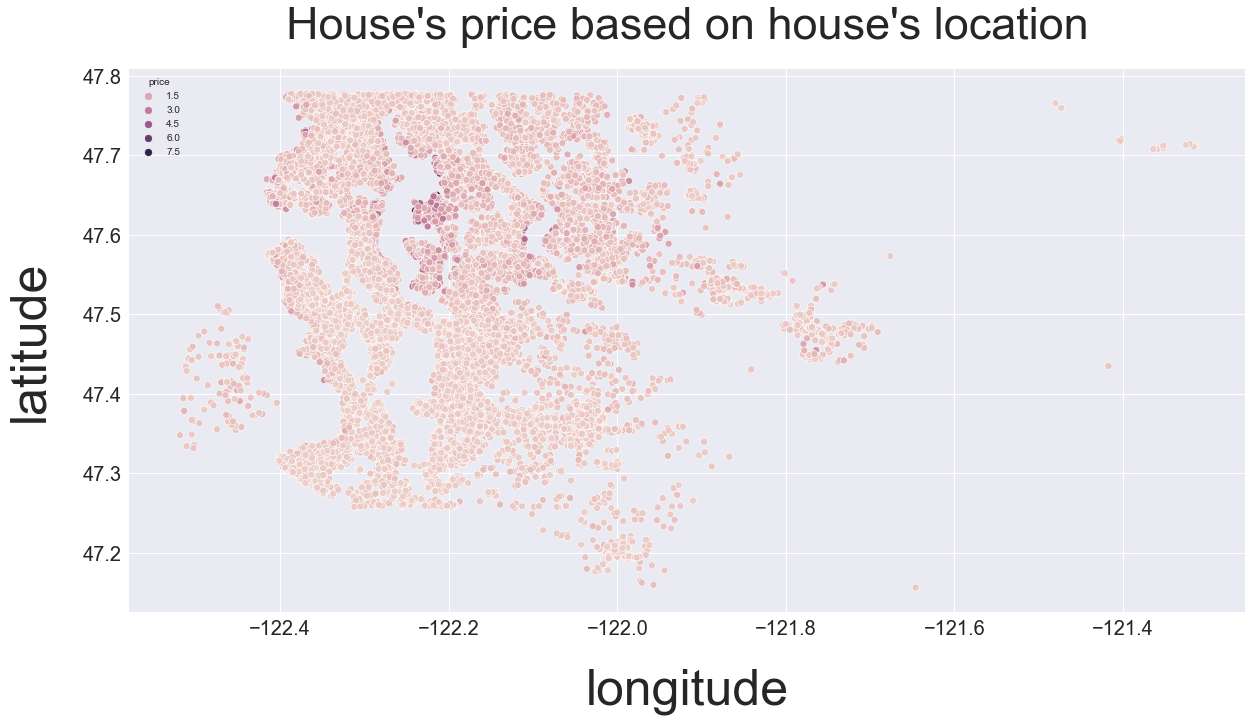

In [3]:
# Instantiate figure and set its size
fig,ax = plt.subplots(figsize=(20,10))
# Plot the scatterplot
sns.scatterplot(x='long', y='lat', hue='price', data=house)
# Add title and axis names
plt.title("House's price based on house's location",pad=30,fontsize=45)
plt.xlabel('longitude',labelpad=30,fontsize=50 )
plt.ylabel('latitude',labelpad=30,fontsize=50)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)

##### Drop Irrelevant Columns
For this lab, we will only be using a subset of all of the features present in the  House dataset. In this step, you will drop all irrelevant columns.

In [4]:
# Drop some columns from our data frame
# Display the top 5 rows by using .head() method
house = house.drop(columns=["id","date","view","sqft_above","sqft_basement","yr_renovated","lat","long","sqft_living15","sqft_lot15"],axis=1)
house.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode
0,221900.0,3,1.00,1180,5650,1.0,NaN,Average,7 Average,1955,98178
1,538000.0,3,2.25,2570,7242,2.0,NO,Average,7 Average,1951,98125
2,180000.0,2,1.00,770,10000,1.0,NO,Average,6 Low Average,1933,98028
3,604000.0,4,3.00,1960,5000,1.0,NO,Very Good,7 Average,1965,98136
4,510000.0,3,2.00,1680,8080,1.0,NO,Average,8 Good,1987,98074


#### Variable Descriptions
Variable Descriptions Look in data_description.txt for a full description of all variables.

A preview of some of the columns: 

price - Sale price (prediction target)

bedrooms - Number of bedrooms

bathrooms - Number of bathrooms

sqft_living - Square footage of living space in the home

sqft_lot - Square footage of the lot

floors - Number of floors (levels) in house

waterfront - Whether the house is on a waterfront

Includes Duwamish, Elliott Bay, Puget Sound, Lake Union, Ship Canal, Lake Washington, Lake Sammamish, other lake, and river/slough waterfronts view - Quality of view from house

Includes views of Mt. Rainier, Olympics, Cascades, Territorial, Seattle Skyline, Puget Sound, Lake Washington, Lake Sammamish, small lake / river / creek, and other.

condition - How good the overall condition of the house is. Related to maintenance of house.

grade` - Overall grade of the house. Related to the construction and design of the house.

yr_built - Year when house was built

zipcode` - ZIP Code used by the United States Postal Service


Some more information about the features of this dataset by using the .info() method:

In [5]:
# Getting a summary for house data frame 
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        21597 non-null  float64
 1   bedrooms     21597 non-null  int64  
 2   bathrooms    21597 non-null  float64
 3   sqft_living  21597 non-null  int64  
 4   sqft_lot     21597 non-null  int64  
 5   floors       21597 non-null  float64
 6   waterfront   19221 non-null  object 
 7   condition    21597 non-null  object 
 8   grade        21597 non-null  object 
 9   yr_built     21597 non-null  int64  
 10  zipcode      21597 non-null  int64  
dtypes: float64(3), int64(5), object(3)
memory usage: 1.8+ MB


We can notice that the columns' data types are intger, float, and object.

Let's use the describe() function used to generate descriptive statistics that summarize the central tendency.

In [6]:
# Display the house data frame statistic by using .describe() method
house.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,yr_built,zipcode
count,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,21597.000000,21597.000000
mean,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,1970.999676,98077.951845
std,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,29.375234,53.513072
min,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,1900.000000,98001.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,1951.000000,98033.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,1975.000000,98065.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,1997.000000,98118.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,2015.000000,98199.000000


#### Dealing with Categorical Variables 
Categorical variable: does not represent Continuous numbers but refers to classification information instead of numerical features.

We have some columns like (floors, bedrooms, and bathrooms) that refer to classification information even their datatypes refer to numeric features so we will convert their datatypes to objects.

In [7]:
# convert the data type of the column floors to object by using .astype() method.
house["floors"] = house["floors"].astype("str")

In [8]:
# Check the floors column data type by using .dtype
house["floors"].dtype

dtype('O')

In [9]:
# convert the data type of the column zipcode to object by using .astype() method
house["zipcode"] = house["zipcode"].astype("str")

In [10]:
#Extract Catagorical Variables
categoricals = house.select_dtypes(include=object)
categoricals.head()

,floors,waterfront,condition,grade,zipcode
0,1.0,NaN,Average,7 Average,98178
1,2.0,NO,Average,7 Average,98125
2,1.0,NO,Average,6 Low Average,98028
3,1.0,NO,Very Good,7 Average,98136
4,1.0,NO,Average,8 Good,98074


##### Handle Missing Values
In this step, you will assess the presence of NaN values in our subset of data. Let's check for unique values for categoricals and if there are any null values.

In [11]:
# Column Values and Null Counts:
# print .value_counts() for each column in obj_df
for column in categoricals.columns:
    print(f"COLUMN: '{column}'")
    print(f"Number of unique values: {len(categoricals[column].unique())}")
    print(f"Number of nulls: {categoricals[column].isnull().sum()}")
    print(categoricals[column].value_counts())
    print()

COLUMN: 'floors'
Number of unique values: 6
Number of nulls: 0
1.0    10673
2.0     8235
1.5     1910
3.0      611
2.5      161
3.5        7
Name: floors, dtype: int64

COLUMN: 'waterfront'
Number of unique values: 3
Number of nulls: 2376
NO     19075
YES      146
Name: waterfront, dtype: int64

COLUMN: 'condition'
Number of unique values: 5
Number of nulls: 0
Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: condition, dtype: int64

COLUMN: 'grade'
Number of unique values: 11
Number of nulls: 0
7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: grade, dtype: int64

COLUMN: 'zipcode'
Number of unique values: 70
Number of nulls: 0
98103    602
98038    589
98115    583
98052    574
98117    553
        ... 
98102    104
98010    100
98024     

In [12]:
# Remove the null values by using .dropna()
categoricals.dropna()

,floors,waterfront,condition,grade,zipcode
1,2.0,NO,Average,7 Average,98125
2,1.0,NO,Average,6 Low Average,98028
3,1.0,NO,Very Good,7 Average,98136
4,1.0,NO,Average,8 Good,98074
5,1.0,NO,Average,11 Excellent,98053
...,...,...,...,...,...
21591,2.0,NO,Average,8 Good,98116
21592,3.0,NO,Average,8 Good,98103
21593,2.0,NO,Average,8 Good,98146
21594,2.0,NO,Average,7 Average,98144


Now , The categoricals dataframe is empty from null values.

In [13]:
# Distinguish between the continuous and categoricals Features
continuous = ['sqft_living','sqft_lot','yr_built','price']
categoricals = ['waterfront','grade','condition','floors',"zipcode"]

#### Plot Categorical Variables
Now, pick 5 categorical variables and plot them against Price with a bar graph for each variable. All 5 bar graphs would be on the same figure.

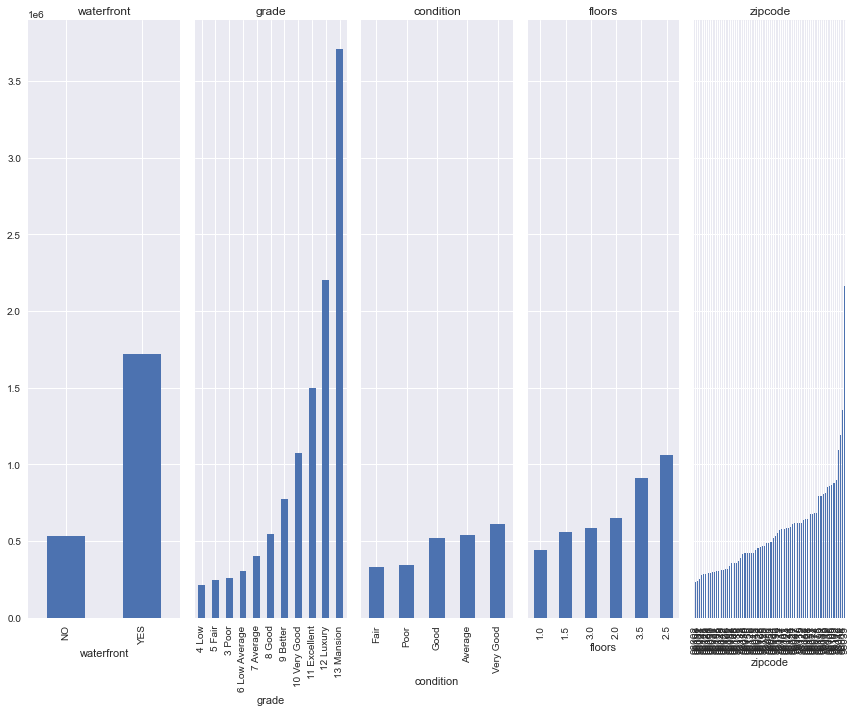

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(12,10), sharey=True)

categoricals = ['waterfront','grade','condition',"floors","zipcode"]

for col, ax in zip(categoricals, axes.flatten()):
    (house.groupby(col)               # group values together by column of interest
         .mean()['price']       # take the mean of the saleprice for each group
         .sort_values()              # sort the groups in ascending order
         .plot
         .bar(ax=ax))                # create a bar graph on the ax
    
    ax.set_title(col)                # Make the title the name of the column
    
fig.tight_layout()

##### Convert Categorical Features into Numbers
A built-in assumption of the sci-kit-learn library is that all data being fed into a machine learning model is already in a numeric format, otherwise, you will get a ValueError when you try to fit a model. In this step, you will use an OrdinalEncoder to replace data within individual non-numeric columns with 0s and 1s, and an OneHotEncoder to replace columns containing more than two categories with multiple "dummy" columns containing 0s and 1s.
At this point, a sci-kit-learn model should be able to run without errors!

#### Create dummy variables
Create dummy variables for the categorical features you chose remember to drop the first. Drop the Categorical columns that you used, contact the dummy columns to our continuous variables, and assign it to a new variable

In [15]:
# Create dummy variables for the categorical features
dummies = pd.get_dummies(house[categoricals], prefix=categoricals, drop_first=True)
dummies

,waterfront_YES,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
21593,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
21594,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
21595,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Drop the categoricals variables from the house data frame
house_preprocessed = house.drop(['waterfront','grade','condition',"floors","zipcode"], axis=1)

#### Combine Categorical and Continuous Features
Finally, we want to concatenate the new data frame together with the original house_preprocessed.

In [17]:
# Join the dummies data frame and house_preprocessed
# Display the five top rows by using .head method.
house_preprocessed = pd.concat([house_preprocessed,dummies],axis=1)
house_preprocessed.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,waterfront_YES,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,221900.0,3,1.00,1180,5650,1955,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,538000.0,3,2.25,2570,7242,1951,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,180000.0,2,1.00,770,10000,1933,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,604000.0,4,3.00,1960,5000,1965,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,510000.0,3,2.00,1680,8080,1987,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Ok, everything is numeric now! We have completed the minimum necessary preprocessing to use these features in a model!

## Modeling

#### Perform a Train-Test Split
Use train_test_split with the default split size. At the end you should have X_train, X_test, y_train, and y_test variables, where y represents Price and X represents all other columns.

In [18]:
from sklearn.model_selection import train_test_split

The prediction target for this analysis is the price of the home, so we separate the data into X and y accordingly:

In [19]:
X = house_preprocessed.drop(columns=["price"],axis=1)
y = house_preprocessed["price"]

Next, we separate the data into a train set and a test set prior to performing any preprocessing steps:

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Prepare Both Sets for Modeling

In [21]:
# Display the five top rows of X_train by using .head method.
X_train.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,waterfront_YES,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
6243,4,2.00,1440,4855,1972,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8986,3,1.75,1430,9857,1980,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9419,4,2.75,3120,5000,2010,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10155,4,2.50,2060,6958,1974,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10436,3,2.00,2500,4080,1922,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
X_train.isna().sum()

bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
yr_built         0
                ..
zipcode_98177    0
zipcode_98178    0
zipcode_98188    0
zipcode_98198    0
zipcode_98199    0
Length: 94, dtype: int64

In [23]:
# Check the shape of the X_train data frame by using .shape
X_train.shape

(17277, 94)

X_train is a DataFrame with  17277 rows and 94 columns.

In [24]:
# Display the five top rows of X_test by using .head method.
X_test.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,yr_built,waterfront_YES,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
3686,3,0.75,850,8573,1945,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
10247,3,1.00,1510,6083,1940,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4037,4,2.25,1790,42000,1983,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3437,2,1.50,1140,2500,1988,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19291,3,1.00,1500,3920,1947,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
# Check the shape of the X_test data frame by using .shape
X_test.shape

(4320, 94)

X_test is a DataFrame with 4320 rows and 94 columns.

#### Continuous Features
Lets take a look on the both X_train and X_test datasets and extract the continuous Features.

In [26]:
# Continuous Features
continuous = ["sqft_living","yr_built","sqft_lot","bedrooms","bathrooms"]

In [27]:
# Continuous Features for each X_train and  X_test datasets.
X_train_cont = X_train[continuous] 
X_test_cont = X_test[continuous]

#### A visualization of the distribution of the target variable:
let's take a look on the target distribution by using histogram.

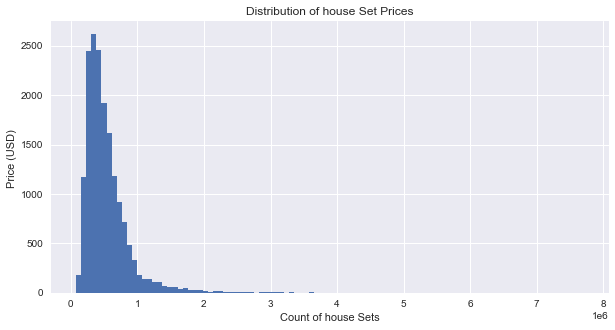

In [28]:
fig, ax = plt.subplots(figsize=(10, 5))

ax.hist(y_train, bins=100)

ax.set_xlabel("Count of house Sets")
ax.set_ylabel("Price (USD) ")
ax.set_title("Distribution of house Set Prices");

We can notice that the distribution of the target (price) is positively skewed when the tail on the right side of the distribution is longer (also often called "fatter"). When there is positive skewness, the mean and median are bigger than the mode.

### 1. Baseline Model
For bulding the Baseline Model we need to discover which feature from the X_train data set has the highest colinearity with the target,We can do that by using heat map for continious variables.

In [29]:
# Display continious variable of X_train dataset.
X_train_cont

,sqft_living,yr_built,sqft_lot,bedrooms,bathrooms
6243,1440,1972,4855,4,2.00
8986,1430,1980,9857,3,1.75
9419,3120,2010,5000,4,2.75
10155,2060,1974,6958,4,2.50
10436,2500,1922,4080,3,2.00
...,...,...,...,...,...
11964,2230,2004,5800,3,2.50
21575,2770,2014,3852,4,2.75
5390,1530,1976,9000,4,1.50
860,380,1963,15000,1,0.75


#### 1. Interpret a Correlation Heatmap to Build a Baseline Model


#### Heat map for continious variables
The code below produces a heatmap showing the correlations between all of the numeric values in our training data. The x and y axis labels indicate the pair of values that are being compared, and then the color and the number are both representing the correlation.

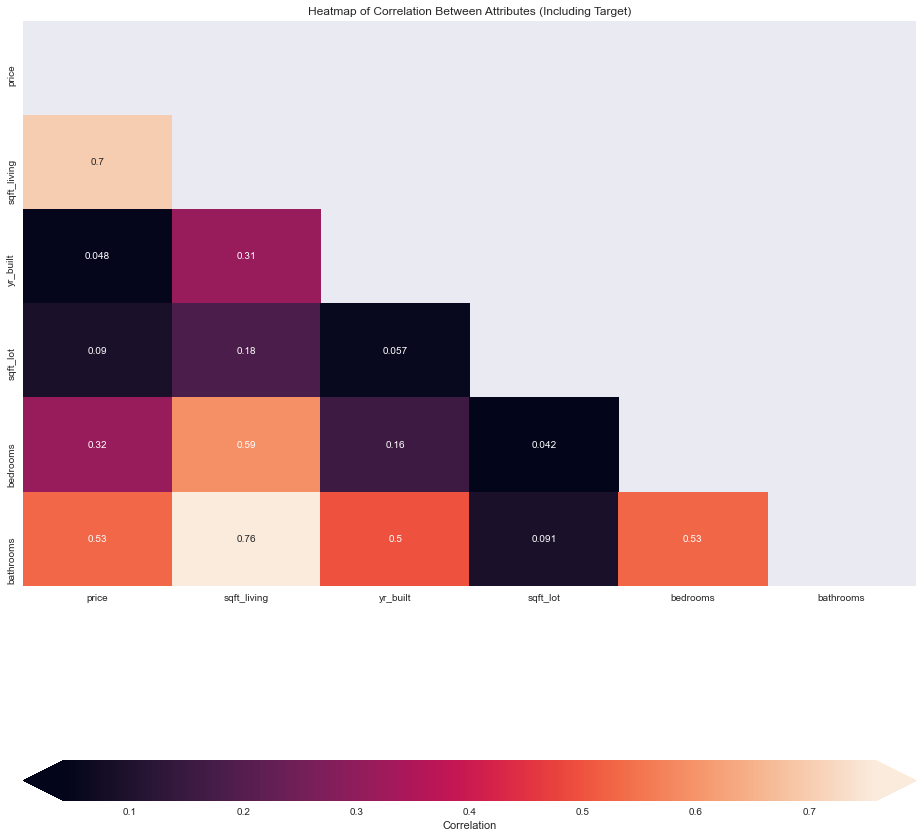

In [30]:
# Create a df with the target as the first column,
# then compute the correlation matrix

heatmap_data = pd.concat([y_train,X_train_cont], axis=1)
corr = heatmap_data.corr()

# Set up figure and axes
fig, ax = plt.subplots(figsize=(16, 16))

# Plot a heatmap of the correlation matrix, with both
# numbers and colors indicating the correlations
sns.heatmap(
    # Specifies the data to be plotted
    data=corr,
    # The mask means we only show half the values,
    # instead of showing duplicates. It's optional.
    
    mask=np.triu(np.ones_like(corr, dtype=bool)),
    ax=ax,
    # Specifies that we want labels, not just colors
    annot=True,
    # Customizes colorbar appearance
    cbar_kws={"label": "Correlation", "orientation": "horizontal", "pad": .2, "extend": "both"}
)

# Customize the plot appearance
ax.set_title("Heatmap of Correlation Between Attributes (Including Target)");


Based on the plot above,The  most strongly feater correlated with the target (price) is Square footage of living space in the home.   

In [31]:
most_correlated_feature = "sqft_living"

Let's make a scatter plot to check linearity between the Square footage of living space in the home

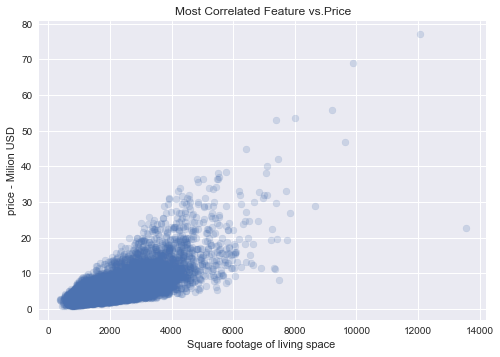

In [32]:
# create the figure
fig, ax = plt.subplots()
# create a scatter plot 
ax.scatter(X_train[most_correlated_feature],y_train/100000, alpha=0.2)
# Add labels
ax.set_xlabel("Square footage of living space ")
ax.set_ylabel("price - Milion USD")
# Add title
ax.set_title("Most Correlated Feature vs.Price");

clear linear relationship between the Square footage of living space feature and the target (price).

#### Building a Baseline Model
Now, we'll build a linear regression model using just the Square footage of living feature, which will serve as our baseline model, we will be using a LinearRegression model from scikit-learn 
(https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html)

In [33]:
# import LinearRegression model from sklearn library
from sklearn.linear_model import LinearRegression

#### Fit a Model
Fit a linear regression model on the training set

In [34]:
# instantiate a LinearRegression model called baseline_model
baseline_model = LinearRegression()

In [35]:
# Fit the model on X_train and y_train
baseline_model.fit(X_train, y_train)


LinearRegression()

Let's use cross validation to take a look at the model's performance:

Then we evaluate the model using cross_validate and ShuffleSplit, which essentially means that we perform 3 separate train-test splits within our X_train and y_train, then we find both the train and the test scores for each.

In [36]:
# evaluate a model using X_train
from sklearn.model_selection import cross_validate, ShuffleSplit

splitter = ShuffleSplit(n_splits=3, test_size=0.2, random_state=24)

baseline_scores = cross_validate(
    estimator = baseline_model,
    X = X_train[[most_correlated_feature]],
    y = y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.4906105322840632
Validation score: 0.4994294302788367


#### Because we are using the .score method of LinearRegression, these are r-squared scores.

That means that each of them represents the amount of variance of the target (price) that is explained by the model's feature ("Square footage of living") and parameters (intercept value and coefficient values for the features)

In general, this seems like a fairly not strong model. It is getting nearly identical performance on training subsets compared to the validation subsets, explaining around 50% of variation by the relationship between the dependent variable (price) and the independent variable (Square footage of living space in the home.

### 2.Second model
Build a Model with All Numeric Features

##### Plot histograms with kde overlay to check the distribution of the predictors

Since there are so many features it is helpful to filter the columns by datatype and number of unique values. We use it to select continuous variables that might be a combination of features that do not object to datatypes and have at least a certain amount of unique values.

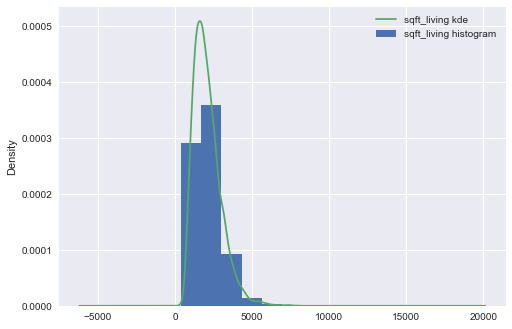

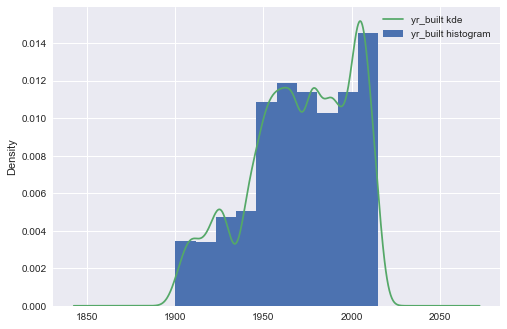

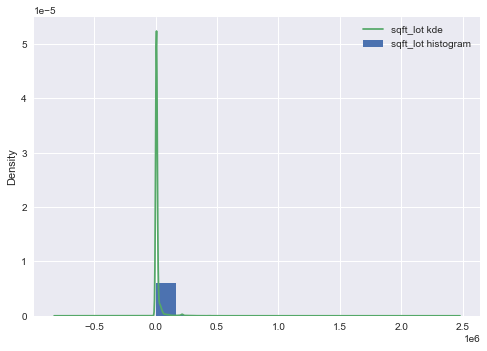

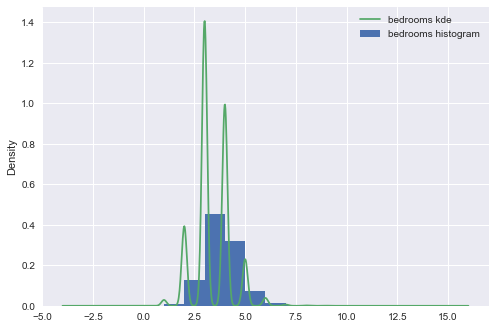

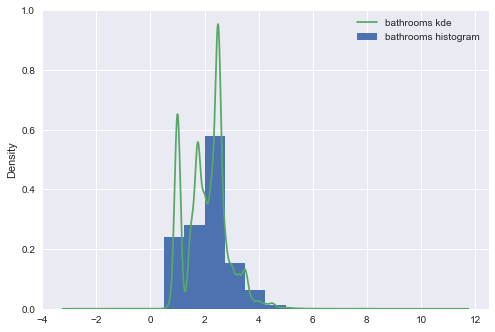

In [37]:
# For all the variables, check distribution by creating a histogram with kde

for column in X_train[continuous] :
    X_train[continuous][column].plot.hist(density=True, label = column+' histogram')
    X_train[continuous][column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

Now we can look at scatter plots of all continious features compared to the target for X_train :

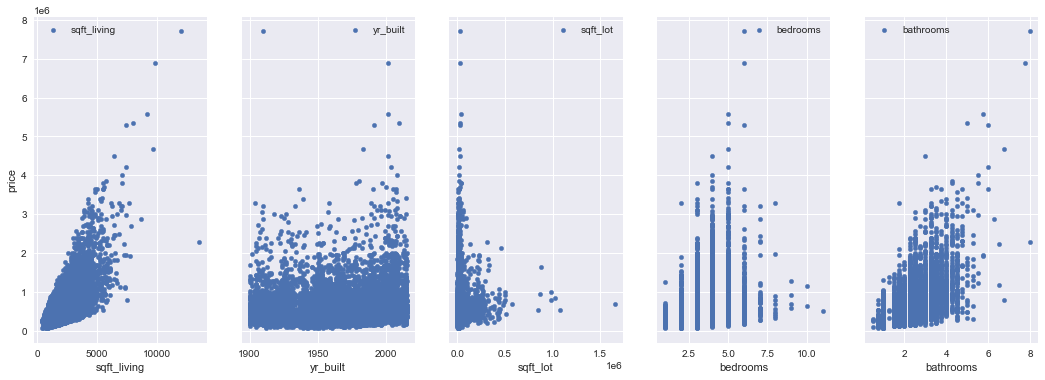

In [38]:
# visualize the relationship between the preditors and the target using scatterplots
fig, axs = plt.subplots(1,5, sharey=True, figsize=(18, 6))
scatterplot_data = pd.concat([X_train_cont, y_train],axis = 1)

for idx, feature in enumerate(X_train_cont):
    scatterplot_data.plot(kind='scatter', x=feature, y='price', ax=axs[idx], label=feature)
plt.legend()
plt.show()

A linear pattern shows on sqft_lot. yr_built is worse, there is too much variance along the y-axis and there's no clear linear relationship between yr_built and price. So we need to remove the year_built feature from both X_train and x_test data sets.

In [39]:
# Drop yr_built column from X_train using .drop() method
# Display the top five rows of X_train_second_model data frame
X_train_second_model = X_train.drop(["yr_built"],axis = 1)
X_train_second_model.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront_YES,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
6243,4,2.00,1440,4855,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8986,3,1.75,1430,9857,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9419,4,2.75,3120,5000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10155,4,2.50,2060,6958,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10436,3,2.00,2500,4080,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# Drop yr_built column from X_test_numeric using .drop() method
# Display the top five rows of X_test_second_model data frame
X_test = X_test.drop(["yr_built"],axis = 1)
X_test.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront_YES,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_3 Poor,grade_4 Low,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
3686,3,0.75,850,8573,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
10247,3,1.00,1510,6083,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4037,4,2.25,1790,42000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3437,2,1.50,1140,2500,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19291,3,1.00,1500,3920,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Building and Evaluating the Second Model
In the cell below, we use the same process to evaluate a model using X_train_second_model .

#### Fit a Model
Fit a linear regression model on the training set

In [41]:
# instantiate a LinearRegression model called second_model
second_model = LinearRegression()

In [42]:
# Fit the second model on train data set
second_model.fit(X_train_second_model, y_train)

LinearRegression()

#### Calculate MSE
Calculate the mean squared error on the test set

In [43]:
from sklearn.metrics import mean_squared_error
y_hat_test = second_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_hat_test)
test_mse

26386734286.181408

In [44]:
# evaluate a model using X_train
second_model_scores = cross_validate(
    estimator = second_model,
    X = X_train_second_model,
    y = y_train,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", second_model_scores["train_score"].mean())
print("Validation score:", second_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.8269203899138239
Validation score: 0.8254331610826423

Baseline Model
Train score:      0.4906105322840632
Validation score: 0.4994294302788367


Our second model got better scores on the training data and Validation data.
Now, It is better to get a summary of the second model. By using the statsmodels library.
In statistics, ordinary least square (OLS) regression is a method for estimating the unknown parameters in a linear regression model.



In [45]:
# import statsmodels library

import statsmodels.api as sm
import statsmodels.formula.api as smf
# create predictors
predictors = X_train_second_model
# create model intercept
X_int = sm.add_constant(X_train_second_model)
#  fit the ols model
model2 = sm.OLS(y_train,X_int).fit()
# get the model summary
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.827
Method:                 Least Squares   F-statistic:                     887.9
Date:                Wed, 05 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:23:21   Log-Likelihood:            -2.3079e+05
No. Observations:               17277   AIC:                         4.618e+05
Df Residuals:                   17183   BIC:                         4.625e+05
Df Model:                          93                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                2.193e+05   1.34e+04     16.338      0.000    1.93e+05    2.46e+05
bedrooms            -1.544e+04   1748.933     -8.827      0.000   -1.89e+04    -1.2e+04
bathrooms             1.94e+04   2704.017      7.174      0.000    1.41e+04    2.47e+04
sqft_living           160.6916      2.789     57.626      0.000     155.226     166.157
sqft_lot                0.1995      0.032      6.205      0.000       0.136       0.262
waterfront_YES       8.228e+05   1.46e+04     56.201      0.000    7.94e+05    8.52e+05
grade_11 Excellent   2.185e+05   1.03e+04     21.126      0.000    1.98e+05    2.39e+05
grade_12 Luxury      6.464e+05   1.95e+04     33.164      0.000    6.08e+05    6.85e+05
grade_13 Mansion     1.959e+06    4.8e+04     40.803      0.000    1.87e+06    2.05e+06
grade_3 Poor        -1.379e+05   1.54e+05     -0.894      0.371    -4.4e+05    1.64e+05
grade_4 Low         -2.341e+05   3.64e+04     -6.435      0.000   -3.05e+05   -1.63e+05
grade_5 Fair        -2.529e+05   1.38e+04    -18.294      0.000    -2.8e+05   -2.26e+05
grade_6 Low Average -2.663e+05   8707.833    -30.587      0.000   -2.83e+05   -2.49e+05
grade_7 Average     -2.622e+05   7183.616    -36.499      0.000   -2.76e+05   -2.48e+05
grade_8 Good        -2.275e+05   6495.268    -35.020      0.000    -2.4e+05   -2.15e+05
grade_9 Better      -1.332e+05   6381.409    -20.866      0.000   -1.46e+05   -1.21e+05
condition_Fair      -4950.8931   1.34e+04     -0.369      0.712   -3.13e+04    2.14e+04
condition_Good       2.703e+04   2947.324      9.169      0.000    2.12e+04    3.28e+04
condition_Poor      -6.852e+04   3.57e+04     -1.921      0.055   -1.38e+05    1394.809
condition_Very Good  7.169e+04   4615.347     15.533      0.000    6.26e+04    8.07e+04
floors_1.5           5537.2796   4494.315      1.232      0.218   -3272.037    1.43e+04
floors_2.0          -2.053e+04   3355.797     -6.117      0.000   -2.71e+04    -1.4e+04
floors_2.5           6.077e+04   1.42e+04      4.279      0.000    3.29e+04    8.86e+04
floors_3.0          -7.122e+04   8002.667     -8.899      0.000   -8.69e+04   -5.55e+04
floors_3.5          -3254.0260   5.84e+04     -0.056      0.956   -1.18e+05    1.11e+05
zipcode_98002        1.285e+04   1.55e+04      0.828      0.408   -1.76e+04    4.33e+04
zipcode_98003        1.073e+04   1.38e+04      0.776      0.438   -1.64e+04    3.78e+04
zipcode_98004         7.42e+05   1.35e+04     54.995      0.000    7.16e+05    7.68e+05
zipcode_98005        3.053e+05   1.62e+04     18.893      0.000    2.74e+05    3.37e+05
zipcode_98006        2.597e+05   1.22e+04     21.263      0.000    2.36e+05    2.84e+05
zipcode_98007        2.538e+05   1.71e+04     14.799      0.000     2.2e+05    2.87e+05
zipcode_98008        2.774e+05   1.37e+04     20.255      0.000    2.51e+05    3.04e+05
zip

We can notice from the model summary there is strong multicollinearity among the features.

R squared refers to: In this model around 82% of the variation is explained by the relationship between the dependent variable (price) and the independent variables. 

Let's explain some concepts that appear in the model summary:

###### Coefficients: 
The coefficients of the features also describe the mathematical relationship between each independent variable and the dependent variable, which in this case is the house pricing based on house features.
That means how much of an impact the features have on the dependent variable (price).How much does the dependent variable change when there is a one-unit change in the feature variable and the other characteristics remain constant?

###### R-squared
The percentage of variation explained by the relationship between the dependent variable and the independent variables. Lies within values between 0 and 1.
In this case , the relationship between the dependent variable (price) and the independent variables (features) explains 82% of the variation in the data.


###### P>|t| or p-value
p-values for the t-test

Again we can compare the p-values or the likelihood that we would observe our data by random chance if our features had no statistically significant relationship to the charges variable. When we compare the p-values of our features with a significance threshold of 0.05 individually, if:
𝑝 < 0.05 : Reject the null hypothesis.that means there is no relationship between the features of our model and the target (price)

𝑝 >= 0.05 :Fail to reject,the null hypothesis. There is no relationship between the features of our model and the target (price)
We suspect our model's issues are related to multicollinearity, let's try to narrow down those features.

### Selecting Features

I will discuss using coefficients of regression models for selecting and interpreting features.

This is based on the idea that when all features are on the same scale, the most important features should have the highest coefficients in the model, while features uncorrelated with the output variables should have coefficient values close to zero.

#### Selecting Features with sklearn.feature_selection
Scikit-learn has a submodule called feature_selection that includes tools to help reduce the feature set.
We'll use RFECV (documentation here). "RFE" stands for "recursive feature elimination", meaning that it repeatedly scores the model, finds and removes the feature with the lowest "importance", then scores the model again.
If the new score is better than the previous score, it continues removing features until the minimum is reached.
"CV" stands for "cross validation" here, and we can use the same splitter we have been using to test our data so far.).

In [46]:
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler

# Importances are based on coefficient magnitude, so
# we need to scale the data to normalize the coefficients
X_train_for_RFECV = StandardScaler().fit_transform(X_train_second_model)

model_for_RFECV = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_train_for_RFECV, y_train)

# Print the results
print("Was the column selected?")
for index, col in enumerate(X_train_second_model.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
bedrooms: True
bathrooms: True
sqft_living: True
sqft_lot: True
waterfront_YES: True
grade_11 Excellent: True
grade_12 Luxury: True
grade_13 Mansion: True
grade_3 Poor: False
grade_4 Low: True
grade_5 Fair: True
grade_6 Low Average: True
grade_7 Average: True
grade_8 Good: True
grade_9 Better: True
condition_Fair: False
condition_Good: True
condition_Poor: True
condition_Very Good: True
floors_1.5: False
floors_2.0: True
floors_2.5: True
floors_3.0: True
floors_3.5: False
zipcode_98002: False
zipcode_98003: False
zipcode_98004: True
zipcode_98005: True
zipcode_98006: True
zipcode_98007: True
zipcode_98008: True
zipcode_98010: True
zipcode_98011: True
zipcode_98014: True
zipcode_98019: True
zipcode_98022: False
zipcode_98023: True
zipcode_98024: True
zipcode_98027: True
zipcode_98028: True
zipcode_98029: True
zipcode_98030: False
zipcode_98031: False
zipcode_98032: False
zipcode_98033: True
zipcode_98034: True
zipcode_98038: True
zipcode_98039: True
zipcode_9804

 measure multicollinearity is with variance inflation factor (StatsModels documentation here). A "rule of thumb" for VIF is that 5 is too high 

In [47]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# the independent variables set
X = X_train_second_model
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                   for i in range(len(X.columns))]

print(vif_data)

           feature        VIF
0         bedrooms  26.933112
1        bathrooms  26.509639
2      sqft_living  27.564147
3         sqft_lot   1.390897
4   waterfront_YES   1.072761
..             ...        ...
88   zipcode_98177   1.359393
89   zipcode_98178   1.431438
90   zipcode_98188   1.217348
91   zipcode_98198   1.414109
92   zipcode_98199   1.433662

[93 rows x 2 columns]


In [48]:
bad_feature = ["condition_Fair","condition_Poor","grade_3 Poor","floors_3.5","floors_1.5","bathrooms","zipcode_98002",
               "zipcode_98003","zipcode_98022","zipcode_98030","zipcode_98031",
               "zipcode_98032","zipcode_98042","zipcode_98188",
               "zipcode_98198"]              

We will remove these bad features from our X_train and X_test for second model to prepear the data set for next model.

In [49]:
# Drop the bad features from X_train_second_model
# Display the top five rows of  X_train_second_model
X_train_second_model = X_train_second_model.drop(X_train_second_model[bad_feature],axis = 1)
X_train_second_model.head()

,bedrooms,sqft_living,sqft_lot,waterfront_YES,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_4 Low,grade_5 Fair,grade_6 Low Average,...,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98199
6243,4,1440,4855,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8986,3,1430,9857,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9419,4,3120,5000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10155,4,2060,6958,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10436,3,2500,4080,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [50]:
# Drop the bad features from X_test.
X_test = X_test.drop(X_test[bad_feature],axis = 1)

### Model3 :

Now, after we removed the features their p values were not significant. Let's build the third model.

In [51]:
# use the cleaned X_train data fram wich we got from second model
X_train_third_model = X_train_second_model

In [52]:
# Check the shape of the X_train_third_model
X_train_third_model.shape

(17277, 78)

In [53]:
# Check the shape of the X_test
X_test.shape

(4320, 78)

Look at the histogram for the continuous variables in X_train third model and X_test numeric datasets.

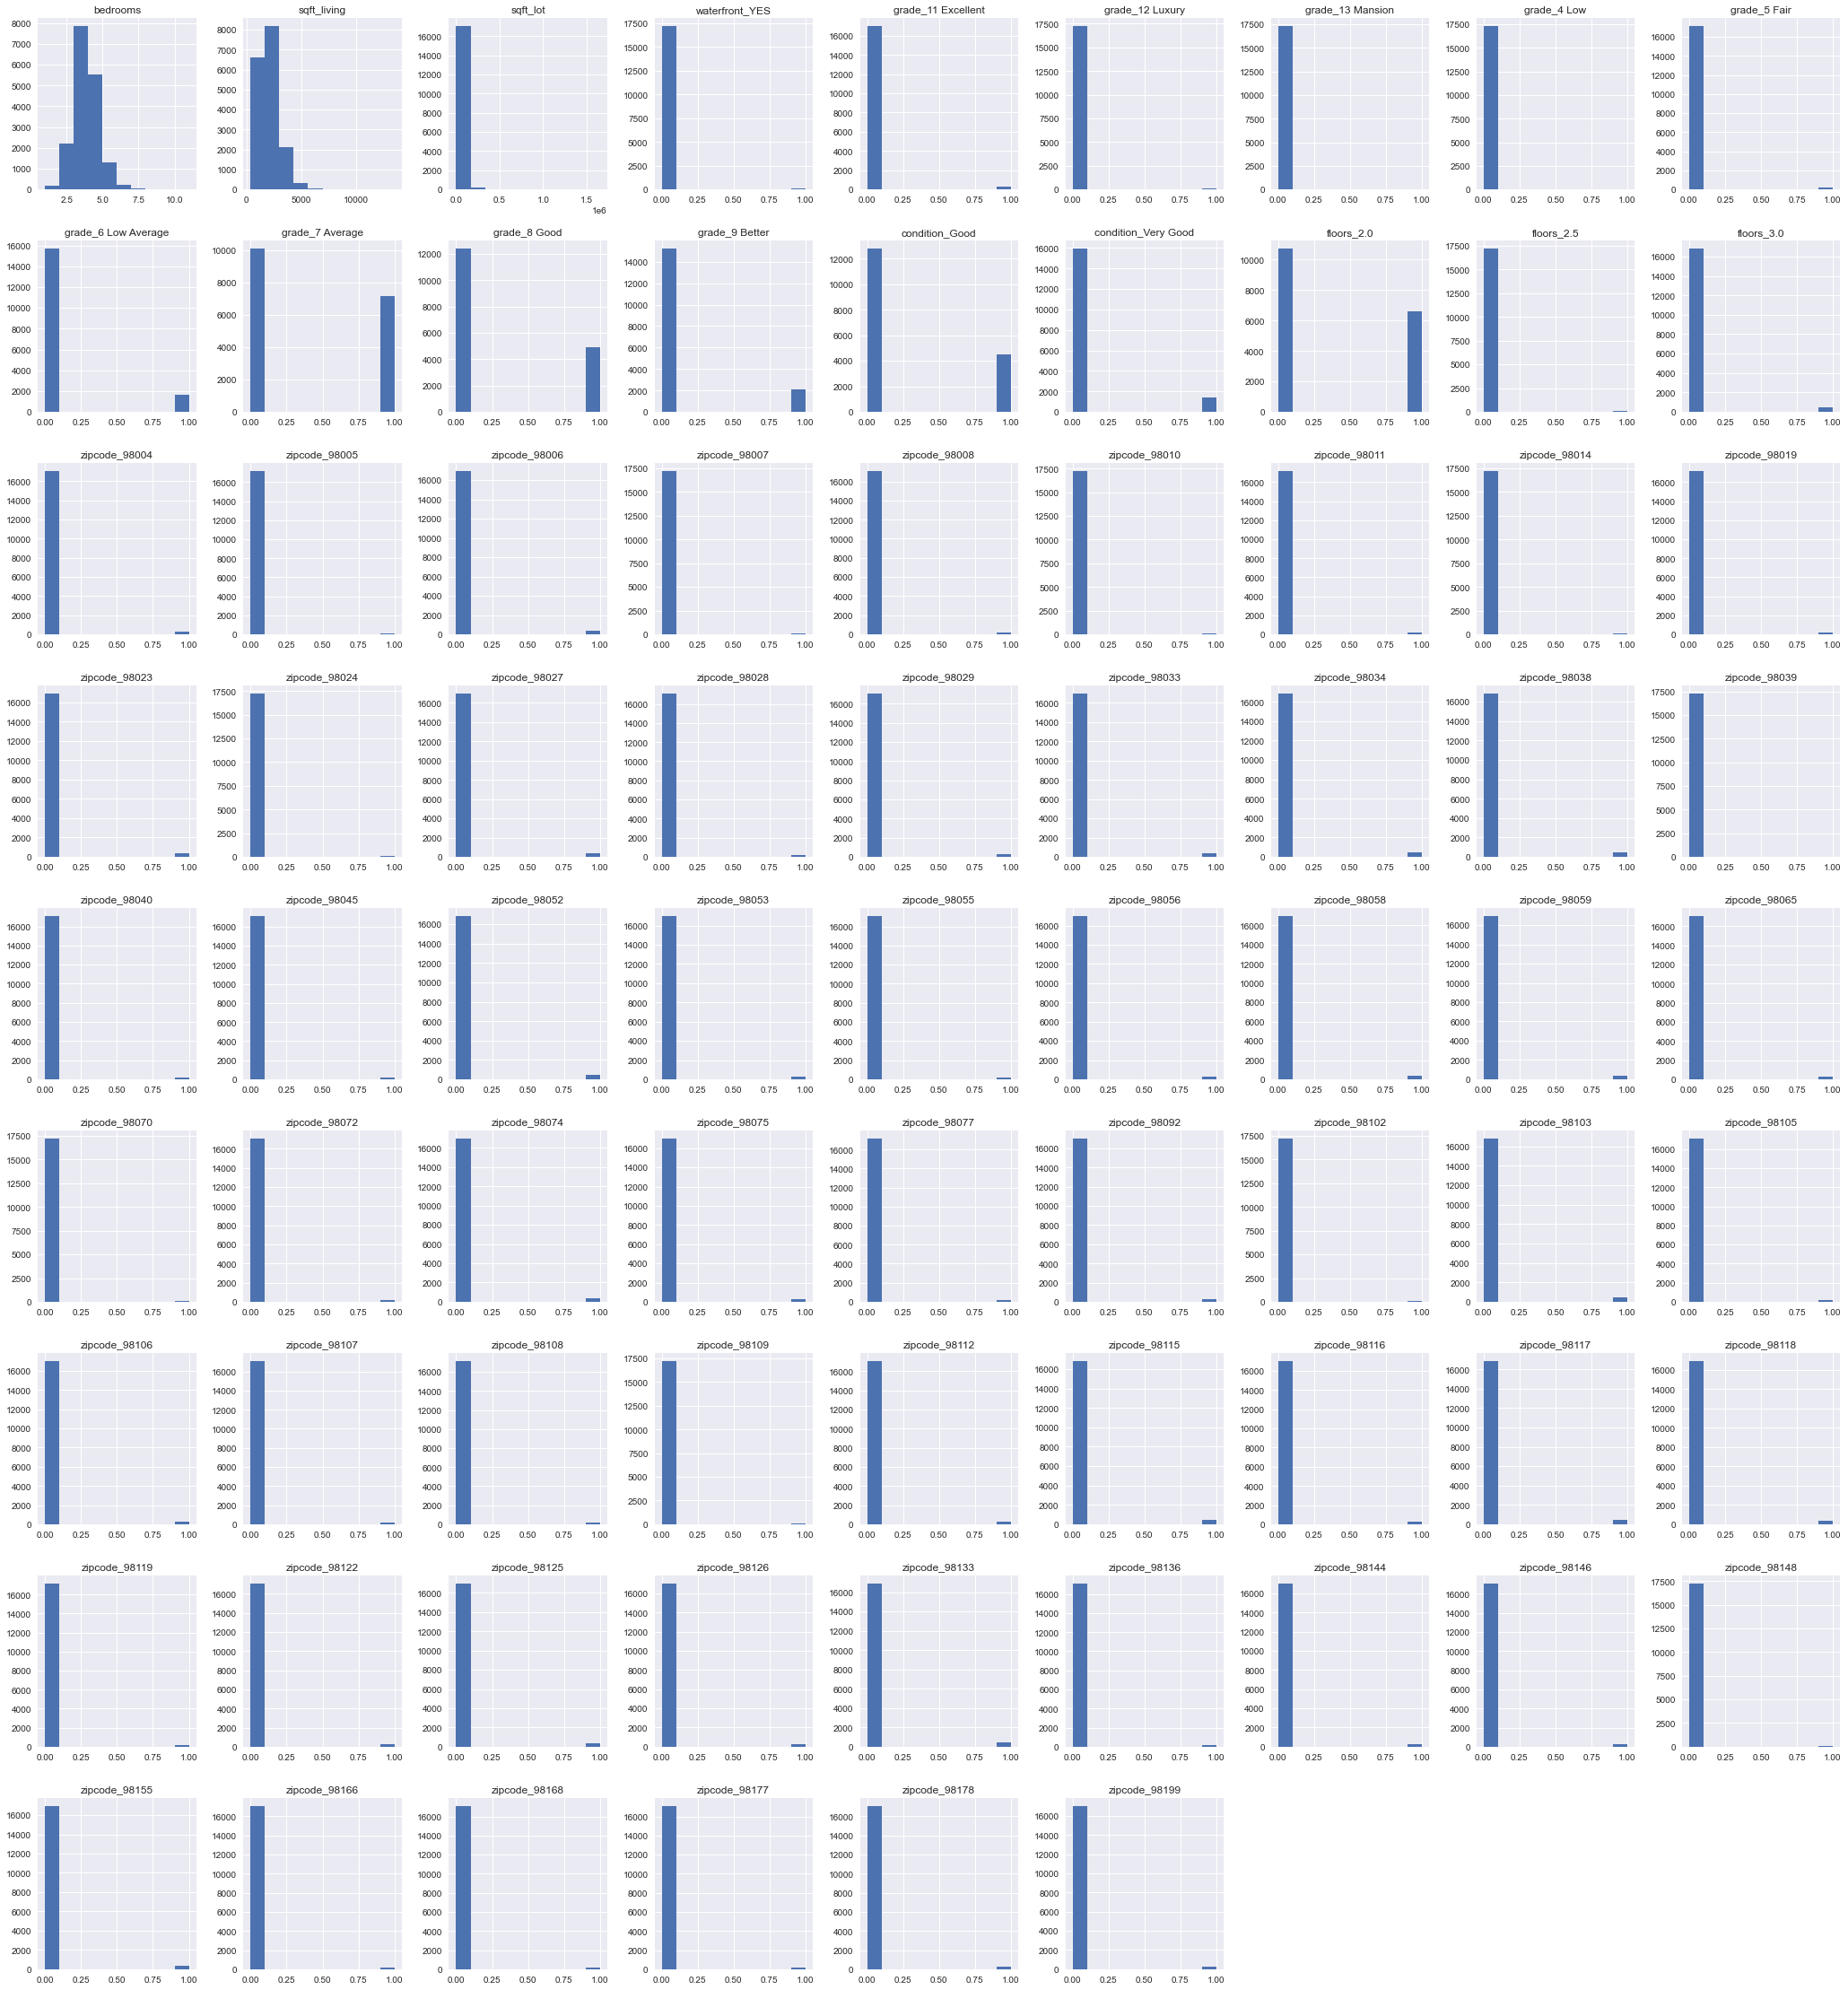

In [54]:
# create a histogram plots for X_train data set.
import warnings
warnings.filterwarnings('ignore')
fig = plt.figure(figsize = (36,40))
ax = fig.gca()
X_train_third_model.hist(ax = ax);

We can see from our histogram of the continuous features that there are many examples where there are a ton of zeros. Let's drop these zero-inflated variables for now and select the features which don't have this characteristic.

In [55]:
# Select the contiuous features from X_train third model data set.
conts = ["sqft_living","sqft_lot","bedrooms"]
X_train_third_model_conts = X_train_third_model[conts]

#### Perform log transformations for the variables where it makes sense
One common option for transforming non-normal variable distributions is to try applying a logarithmic function and observe its impact on the distribution.

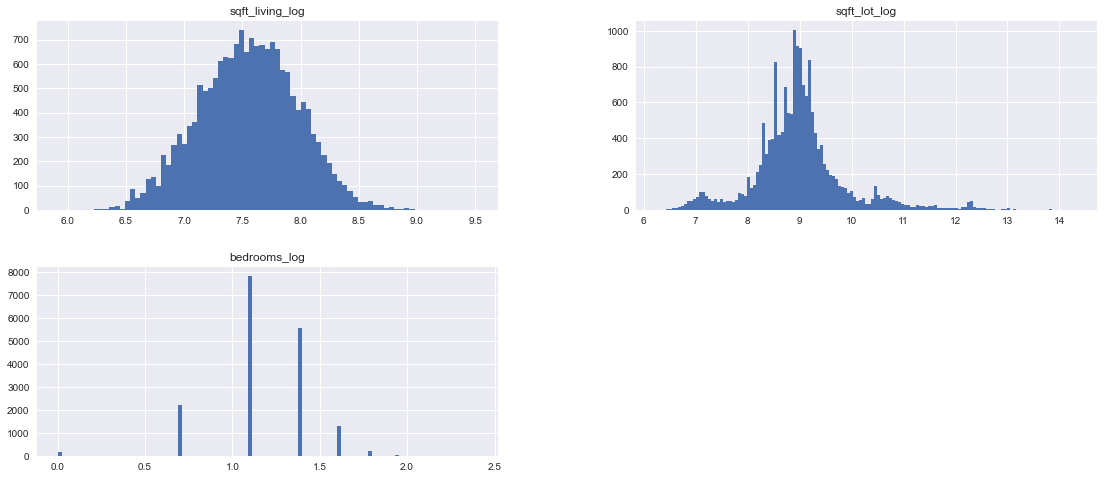

In [56]:
# use numpy library 
import numpy as np
# use log transformation to transforming Non-Normal Features
log_names = [f'{column}_log' for column in X_train_third_model_conts.columns]

X_train_log = np.log(X_train_third_model_conts)
X_train_log.columns = log_names
X_train_log.hist(figsize=(19, 8), bins='auto')
fig.tight_layout();

#### Feature Scaling and Normalization
This is because most machine learning algorithms use Euclidean distance between two data points in their computations. Because of that, making sure that features have similar scales is formally required there. Some algorithms even require features to be zero-centric.

A good rule of thumb is, however, to check your features for normality, and while you're at it, scale your features so they have similar magnitudes

We will define a function 

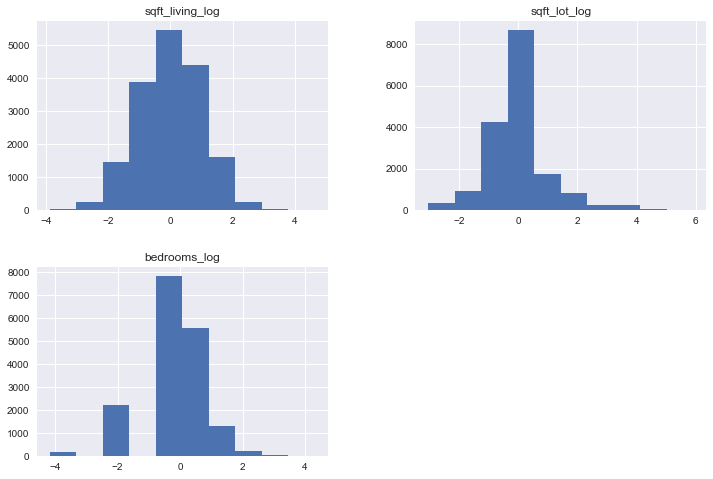

In [57]:
# Create a function for normalize and scale the data set.
def normalize(feature):
    return (feature - feature.mean()) / feature.std()
# Apply the normalize function to the data set
features_final = X_train_log.apply(normalize)
# create a histgram plot.
features_final.hist(figsize  = [12, 8]);

Lets view  the continious features after scaling

In [58]:
# view the continious features after scaling
features_final

,sqft_living_log,sqft_lot_log,bedrooms_log
6243,-0.661437,-0.557527,0.733727
8986,-0.677889,0.228192,-0.282461
9419,1.164030,-0.524875,0.733727
10155,0.183934,-0.158236,0.733727
10436,0.640979,-0.750483,-0.282461
...,...,...,...
11964,0.371147,-0.360203,-0.282461
21575,0.883110,-0.814284,0.733727
5390,-0.518305,0.127275,0.733727
860,-3.806766,0.694037,-4.163121


In [59]:
# remove the features before log and normalize
X_train_third_model = X_train_third_model.drop(columns = ["sqft_living","sqft_lot","bedrooms"],axis = 1)
X_train_third_model.head()

,waterfront_YES,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_4 Low,grade_5 Fair,grade_6 Low Average,grade_7 Average,grade_8 Good,grade_9 Better,...,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98199
6243,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
8986,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
9419,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
10155,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
10436,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


We want to concatenate the new dataframe (features_final) together with the X_train for third model

In [60]:
# concat the X_train_third_model with final feature by using .concat()method.
X_train_third_model = pd.concat([features_final,X_train_third_model],axis = 1)
X_train_third_model.head()

,sqft_living_log,sqft_lot_log,bedrooms_log,waterfront_YES,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_4 Low,grade_5 Fair,grade_6 Low Average,...,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98199
6243,-0.661437,-0.557527,0.733727,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
8986,-0.677889,0.228192,-0.282461,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9419,1.164030,-0.524875,0.733727,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10155,0.183934,-0.158236,0.733727,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10436,0.640979,-0.750483,-0.282461,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
# view X_train columns
X_train_third_model.columns

Index(['sqft_living_log', 'sqft_lot_log', 'bedrooms_log', 'waterfront_YES',
       'grade_11 Excellent', 'grade_12 Luxury', 'grade_13 Mansion',
       'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average',
       'grade_8 Good', 'grade_9 Better', 'condition_Good',
       'condition_Very Good', 'floors_2.0', 'floors_2.5', 'floors_3.0',
       'zipcode_98004', 'zipcode_98005', 'zipcode_98006', 'zipcode_98007',
       'zipcode_98008', 'zipcode_98010', 'zipcode_98011', 'zipcode_98014',
       'zipcode_98019', 'zipcode_98023', 'zipcode_98024', 'zipcode_98027',
       'zipcode_98028', 'zipcode_98029', 'zipcode_98033', 'zipcode_98034',
       'zipcode_98038', 'zipcode_98039', 'zipcode_98040', 'zipcode_98045',
       'zipcode_98052', 'zipcode_98053', 'zipcode_98055', 'zipcode_98056',
       'zipcode_98058', 'zipcode_98059', 'zipcode_98065', 'zipcode_98070',
       'zipcode_98072', 'zipcode_98074', 'zipcode_98075', 'zipcode_98077',
       'zipcode_98092', 'zipcode_98102', 'zip

<AxesSubplot:>

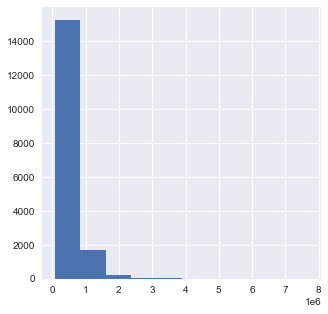

In [62]:
# plot the  target histgram
y_train.hist(figsize  = (5,5))

We can notice the target (price) positivaly skwied 

In [63]:
# take log transform for target 
# normalize the target
y_train_log = np.log(y_train)
y_train_scale = normalize(y_train_log)

<AxesSubplot:>

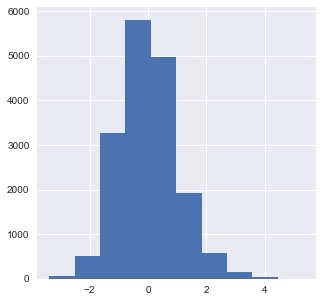

In [64]:
# visualize the scaled target (price) by using histgram
y_train_scale.hist(figsize = (5,5))

Lets make the same changes on X_test dataset.

In [65]:
# check for the continious features on X_test dataset
X_test_conts = X_test[conts]

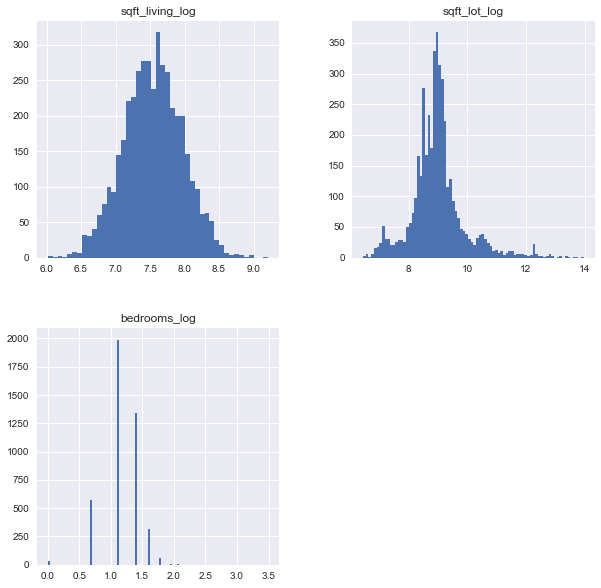

In [66]:
# Apply log transform for continious features on X_test.
log_names = [f'{column}_log' for column in X_test_conts.columns]

X_test_log = np.log(X_test_conts)
X_test_log.columns = log_names
X_test_log.hist(figsize=(10, 10), bins='auto')
fig.tight_layout();

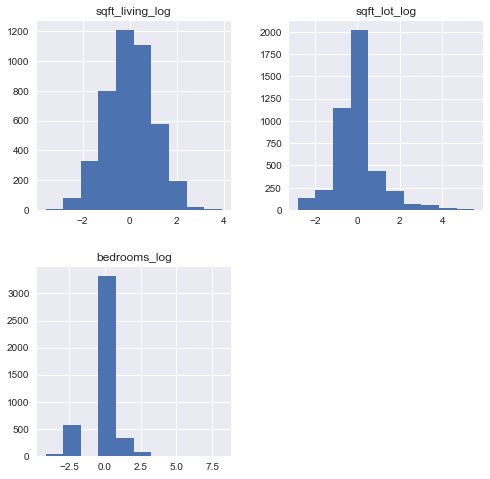

In [67]:
# apply scale for the X_test
feature_scale = X_test_log.apply(normalize)

feature_scale.hist(figsize  = (8, 8));

In [68]:
# drop the non normal distribution columns from x_test dataset.
X_test = X_test.drop(columns = ["sqft_living","sqft_lot","bedrooms"],axis = 1)

We want to concatenate the new dataframe (features_scale) together with the X_test. 

In [69]:
# concat the X_test with  feature_scale by using .concat()method.
X_test = pd.concat([feature_scale,X_test],axis = 1)
X_test.head()

,sqft_living_log,sqft_lot_log,bedrooms_log,waterfront_YES,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_4 Low,grade_5 Fair,grade_6 Low Average,...,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98199
3686,-1.870573,0.075574,-0.268749,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,0
10247,-0.523849,-0.303454,-0.268749,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4037,-0.125182,1.830925,0.746178,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3437,-1.182603,-1.285719,-1.699209,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19291,-0.539422,-0.788845,-0.268749,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
# check for the X_test data set by using .shape
X_test.shape

(4320, 78)

In [71]:
# apply the log transform on the target in the test data set
# apply normalize function on the target in the test data set
y_test_log = np.log(y_test)
y_test_scale = normalize(y_test_log)

<AxesSubplot:>

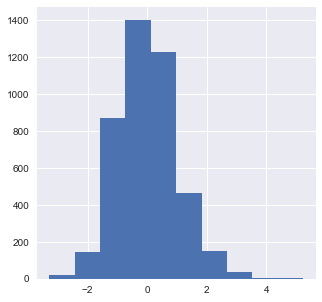

In [72]:
# plot the target after updating
y_test_scale.hist(figsize = (5,5))

#### Building and Evaluating the Thired Model
Now let's build a model using those significant features only:

In the cell below, we use the same process to evaluate a model using X_train_third_model.

In [73]:
# instantiate a LinearRegression model called third_model
third_model = LinearRegression()

#### Fit the third model

In [74]:
# Fit the third model on train data set
third_model.fit(X_train_third_model, y_train_scale)

LinearRegression()

In [75]:
# evauate the model
third_model_scores = cross_validate(
    estimator=third_model,
    X=X_train_third_model,
    y=y_train_scale ,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", third_model_scores["train_score"].mean())
print("Validation score:", third_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.8701058430069164
Validation score: 0.8726805388491354

Baseline Model
Train score:      0.4906105322840632
Validation score: 0.4994294302788367


In [76]:
# create a model intercept
X_int = sm.add_constant(X_train_third_model)
# fit the model on the train data set
model3 = sm.OLS(y_train_scale,X_int).fit()
# getting the summary
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     1487.
Date:                Wed, 05 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:25:08   Log-Likelihood:                -6834.2
No. Observations:               17277   AIC:                         1.383e+04
Df Residuals:                   17198   BIC:                         1.444e+04
Df Model:                          78                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.3581      0.018    -20.303      0.000      -0.393      -0.324
sqft_living_log         0.3934      0.005     72.298      0.000       0.383       0.404
sqft_lot_log            0.1142      0.004     28.850      0.000       0.106       0.122
bedrooms_log           -0.0270      0.004     -7.130      0.000      -0.034      -0.020
waterfront_YES          1.3192      0.034     38.494      0.000       1.252       1.386
grade_11 Excellent      0.2969      0.024     12.370      0.000       0.250       0.344
grade_12 Luxury         0.6014      0.045     13.435      0.000       0.514       0.689
grade_13 Mansion        1.2113      0.111     10.941      0.000       0.994       1.428
grade_4 Low            -1.0509      0.086    -12.277      0.000      -1.219      -0.883
grade_5 Fair           -0.9742      0.032    -30.074      0.000      -1.038      -0.911
grade_6 Low Average    -0.8643      0.020    -42.934      0.000      -0.904      -0.825
grade_7 Average        -0.7005      0.016    -43.314      0.000      -0.732      -0.669
grade_8 Good           -0.4854      0.015    -33.141      0.000      -0.514      -0.457
grade_9 Better         -0.2048      0.015    -13.880      0.000      -0.234      -0.176
condition_Good          0.0712      0.007     10.347      0.000       0.058       0.085
condition_Very Good     0.1945      0.011     18.044      0.000       0.173       0.216
floors_2.0              0.0387      0.008      5.020      0.000       0.024       0.054
floors_2.5              0.0640      0.033      1.927      0.054      -0.001       0.129
floors_3.0             -0.0928      0.019     -4.911      0.000      -0.130      -0.056
zipcode_98004           2.0484      0.025     83.462      0.000       2.000       2.097
zipcode_98005           1.2901      0.032     40.066      0.000       1.227       1.353
zipcode_98006           1.1642      0.021     56.756      0.000       1.124       1.204
zipcode_98007           1.1487      0.035     32.917      0.000       1.080       1.217
zipcode_98008           1.1834      0.025     47.076      0.000       1.134       1.233
zipcode_98010           0.3364      0.040      8.346      0.000       0.257       0.415
zipcode_98011           0.7757      0.030     25.569      0.000       0.716       0.835
zipcode_98014           0.4218      0.036     11.649      0.000       0.351       0.493
zipcode_98019           0.4870      0.031     15.877      0.000       0.427       0.547
zipcode_98023          -0.1427      0.019     -7.332      0.000      -0.181      -0.105
zipcode_98024           0.7053      0.044     15.927      0.000       0.618       0.792
zipcode_98027           0.8605      0.021     40.698      0.000       0.819       0.902
zipcode_98028           0.6970      0.025     27.486      0.000       0.647       0.747
zip

R-squared:
The percentage of variation explained by the relationship between the dependent variable and the independent variables. Lies within values between 0 and 1. In this case , the relationship between the dependent variable and the independent variables explains 87% of the variation in the data.

Let's compute the MSE as well, since this would be more applicable to a business audience.(the amount of error)

In [77]:
# compute the MSE
from sklearn.metrics import mean_squared_error
y_hat_test = third_model.predict(X_test)
test_mse = mean_squared_error(y_test_scale, y_hat_test)
test_mse

0.1321242446659971

The average squared error for the predictions is 0.13, which can  accuracy improves.

#### Selecting Features with sklearn.feature_selection

We'll use RFECV (documentation here). "RFE" stands for "recursive feature elimination", meaning that it repeatedly scores the model, finds and removes the feature with the lowest "importance", then scores the model again. If the new score is better than the previous score, it continues removing features until the minimum is reached. "CV" stands for "cross validation" here, and we can use the same splitter we have been using to test our data so far.

In [78]:
from sklearn.feature_selection import RFECV
from sklearn.preprocessing import StandardScaler

# Importances are based on coefficient magnitude, so
# we need to scale the data to normalize the coefficients
X_train_for_RFECV = StandardScaler().fit_transform(X_train_third_model)

model_for_RFECV = LinearRegression()

# Instantiate and fit the selector
selector = RFECV(model_for_RFECV, cv=splitter)
selector.fit(X_train_for_RFECV, y_train_scale)

# Print the results
print("Was the column selected?")
for index, col in enumerate(X_train_third_model.columns):
    print(f"{col}: {selector.support_[index]}")

Was the column selected?
sqft_living_log: True
sqft_lot_log: True
bedrooms_log: True
waterfront_YES: True
grade_11 Excellent: True
grade_12 Luxury: True
grade_13 Mansion: True
grade_4 Low: True
grade_5 Fair: True
grade_6 Low Average: True
grade_7 Average: True
grade_8 Good: True
grade_9 Better: True
condition_Good: True
condition_Very Good: True
floors_2.0: True
floors_2.5: False
floors_3.0: True
zipcode_98004: True
zipcode_98005: True
zipcode_98006: True
zipcode_98007: True
zipcode_98008: True
zipcode_98010: True
zipcode_98011: True
zipcode_98014: True
zipcode_98019: True
zipcode_98023: True
zipcode_98024: True
zipcode_98027: True
zipcode_98028: True
zipcode_98029: True
zipcode_98033: True
zipcode_98034: True
zipcode_98038: True
zipcode_98039: True
zipcode_98040: True
zipcode_98045: True
zipcode_98052: True
zipcode_98053: True
zipcode_98055: True
zipcode_98056: True
zipcode_98058: True
zipcode_98059: True
zipcode_98065: True
zipcode_98070: True
zipcode_98072: True
zipcode_98074: True


In [79]:
bad_feature2 = ["floors_2.5","zipcode_98168"]

### Model4 : Final model

#### Prepering the data for model4:
Removing the bad feature from the X train and X test data set 

In [80]:
# Remove the bad feature from the X train data set using .drop()method
X_train_forth_model = X_train_third_model.drop(X_train_third_model[bad_feature2]
                                                  ,axis = 1)

In [81]:
# # Remove the bad feature from the X test data set using .drop()method
X_test = X_test.drop(X_test[bad_feature2],axis = 1)
X_test.head()

,sqft_living_log,sqft_lot_log,bedrooms_log,waterfront_YES,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_4 Low,grade_5 Fair,grade_6 Low Average,...,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98177,zipcode_98178,zipcode_98199
3686,-1.870573,0.075574,-0.268749,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
10247,-0.523849,-0.303454,-0.268749,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4037,-0.125182,1.830925,0.746178,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3437,-1.182603,-1.285719,-1.699209,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19291,-0.539422,-0.788845,-0.268749,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [82]:
# check for the X_test data set by using .shape
X_test.shape

(4320, 76)

In [83]:
# # check for the X_train data set by using .shape
X_train_forth_model.shape

(17277, 76)

In [84]:
# display the top five rows of X_train_forth_model data set.
X_train_forth_model.head()

,sqft_living_log,sqft_lot_log,bedrooms_log,waterfront_YES,grade_11 Excellent,grade_12 Luxury,grade_13 Mansion,grade_4 Low,grade_5 Fair,grade_6 Low Average,...,zipcode_98133,zipcode_98136,zipcode_98144,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98177,zipcode_98178,zipcode_98199
6243,-0.661437,-0.557527,0.733727,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
8986,-0.677889,0.228192,-0.282461,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9419,1.164030,-0.524875,0.733727,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10155,0.183934,-0.158236,0.733727,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10436,0.640979,-0.750483,-0.282461,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [85]:
# View the columns of X_train_forth_model data set
X_train_forth_model.columns

Index(['sqft_living_log', 'sqft_lot_log', 'bedrooms_log', 'waterfront_YES',
       'grade_11 Excellent', 'grade_12 Luxury', 'grade_13 Mansion',
       'grade_4 Low', 'grade_5 Fair', 'grade_6 Low Average', 'grade_7 Average',
       'grade_8 Good', 'grade_9 Better', 'condition_Good',
       'condition_Very Good', 'floors_2.0', 'floors_3.0', 'zipcode_98004',
       'zipcode_98005', 'zipcode_98006', 'zipcode_98007', 'zipcode_98008',
       'zipcode_98010', 'zipcode_98011', 'zipcode_98014', 'zipcode_98019',
       'zipcode_98023', 'zipcode_98024', 'zipcode_98027', 'zipcode_98028',
       'zipcode_98029', 'zipcode_98033', 'zipcode_98034', 'zipcode_98038',
       'zipcode_98039', 'zipcode_98040', 'zipcode_98045', 'zipcode_98052',
       'zipcode_98053', 'zipcode_98055', 'zipcode_98056', 'zipcode_98058',
       'zipcode_98059', 'zipcode_98065', 'zipcode_98070', 'zipcode_98072',
       'zipcode_98074', 'zipcode_98075', 'zipcode_98077', 'zipcode_98092',
       'zipcode_98102', 'zipcode_98103', '

#### Building and Evaluating the final  Model
In the cell below, we use the same process to evaluate a model using X_train_forth_model.

#### Fit the Forth model

In [86]:
# install a model called forth model
forth_model = LinearRegression()

In [87]:
# Fit the forth model on train data set
forth_model.fit(X_train_forth_model, y_train_scale)

LinearRegression()

In [88]:
# evaluate the forth model
forth_model_scores = cross_validate(
    estimator=forth_model,
    X=X_train_forth_model,
    y=y_train_scale ,
    return_train_score=True,
    cv=splitter
)

print("Current Model")
print("Train score:     ", forth_model_scores["train_score"].mean())
print("Validation score:", forth_model_scores["test_score"].mean())
print()
print("Baseline Model")
print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Current Model
Train score:      0.8700366881780414
Validation score: 0.8727406486869573

Baseline Model
Train score:      0.4906105322840632
Validation score: 0.4994294302788367


In [89]:
# create a model intercept
X_int = sm.add_constant(X_train_forth_model)
# fit the model on the train data set
model4 = sm.OLS(y_train_scale,X_int).fit()
# getting the summary
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.871
Model:                            OLS   Adj. R-squared:                  0.870
Method:                 Least Squares   F-statistic:                     1525.
Date:                Wed, 05 Oct 2022   Prob (F-statistic):               0.00
Time:                        21:25:16   Log-Likelihood:                -6837.5
No. Observations:               17277   AIC:                         1.383e+04
Df Residuals:                   17200   BIC:                         1.443e+04
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.3511      0.017    -20.173      0.000      -0.385      -0.317
sqft_living_log         0.3941      0.005     72.564      0.000       0.383       0.405
sqft_lot_log            0.1136      0.004     28.782      0.000       0.106       0.121
bedrooms_log           -0.0270      0.004     -7.131      0.000      -0.034      -0.020
waterfront_YES          1.3193      0.034     38.493      0.000       1.252       1.387
grade_11 Excellent      0.2975      0.024     12.392      0.000       0.250       0.345
grade_12 Luxury         0.6021      0.045     13.449      0.000       0.514       0.690
grade_13 Mansion        1.2258      0.110     11.097      0.000       1.009       1.442
grade_4 Low            -1.0531      0.086    -12.303      0.000      -1.221      -0.885
grade_5 Fair           -0.9739      0.032    -30.086      0.000      -1.037      -0.910
grade_6 Low Average    -0.8639      0.020    -43.035      0.000      -0.903      -0.825
grade_7 Average        -0.7022      0.016    -43.492      0.000      -0.734      -0.671
grade_8 Good           -0.4868      0.015    -33.260      0.000      -0.515      -0.458
grade_9 Better         -0.2052      0.015    -13.902      0.000      -0.234      -0.176
condition_Good          0.0702      0.007     10.236      0.000       0.057       0.084
condition_Very Good     0.1936      0.011     17.967      0.000       0.172       0.215
floors_2.0              0.0358      0.008      4.700      0.000       0.021       0.051
floors_3.0             -0.0958      0.019     -5.083      0.000      -0.133      -0.059
zipcode_98004           2.0434      0.024     83.604      0.000       1.995       2.091
zipcode_98005           1.2857      0.032     40.012      0.000       1.223       1.349
zipcode_98006           1.1593      0.020     56.835      0.000       1.119       1.199
zipcode_98007           1.1445      0.035     32.852      0.000       1.076       1.213
zipcode_98008           1.1792      0.025     47.085      0.000       1.130       1.228
zipcode_98010           0.3339      0.040      8.299      0.000       0.255       0.413
zipcode_98011           0.7714      0.030     25.493      0.000       0.712       0.831
zipcode_98014           0.4187      0.036     11.589      0.000       0.348       0.489
zipcode_98019           0.4836      0.031     15.808      0.000       0.424       0.544
zipcode_98023          -0.1472      0.019     -7.614      0.000      -0.185      -0.109
zipcode_98024           0.7013      0.044     15.862      0.000       0.615       0.788
zipcode_98027           0.8581      0.021     40.809      0.000       0.817       0.899
zipcode_98028           0.6930      0.025     27.435      0.000       0.644       0.743
zipcode_98029           1.0553      0.024     43.327      0.000       1.008       1.103
zip

The relationship between the dependent variable and the independent variables explains 87 % of the variation in the data.

In [90]:
# use the cleaned X_train data fram wich we got from the previous model
X_train_final_model = X_train_forth_model
X_test_final = X_test

In [91]:
# Check the shape of the X_train_forth_model
X_train_final_model.shape

(17277, 76)

In [92]:
# Check the shape of the test_final
X_test_final.shape

(4320, 76)

In [93]:
# compute the MSE
from sklearn.metrics import mean_squared_error
y_hat_test = forth_model.predict(X_test_final)
mean_squared_error(y_test_scale,y_hat_test, squared=False)

0.3636013755775276

The average squared error for the predictions is 0.36, which can accuracy improves.

 Best model is model 4

#### Linear regression assumptions

We should investigate each of the assumptions of linear regression, in order to understand how much our model violates them.

##### Linearity
First, let's check whether the linearity assumption holds.

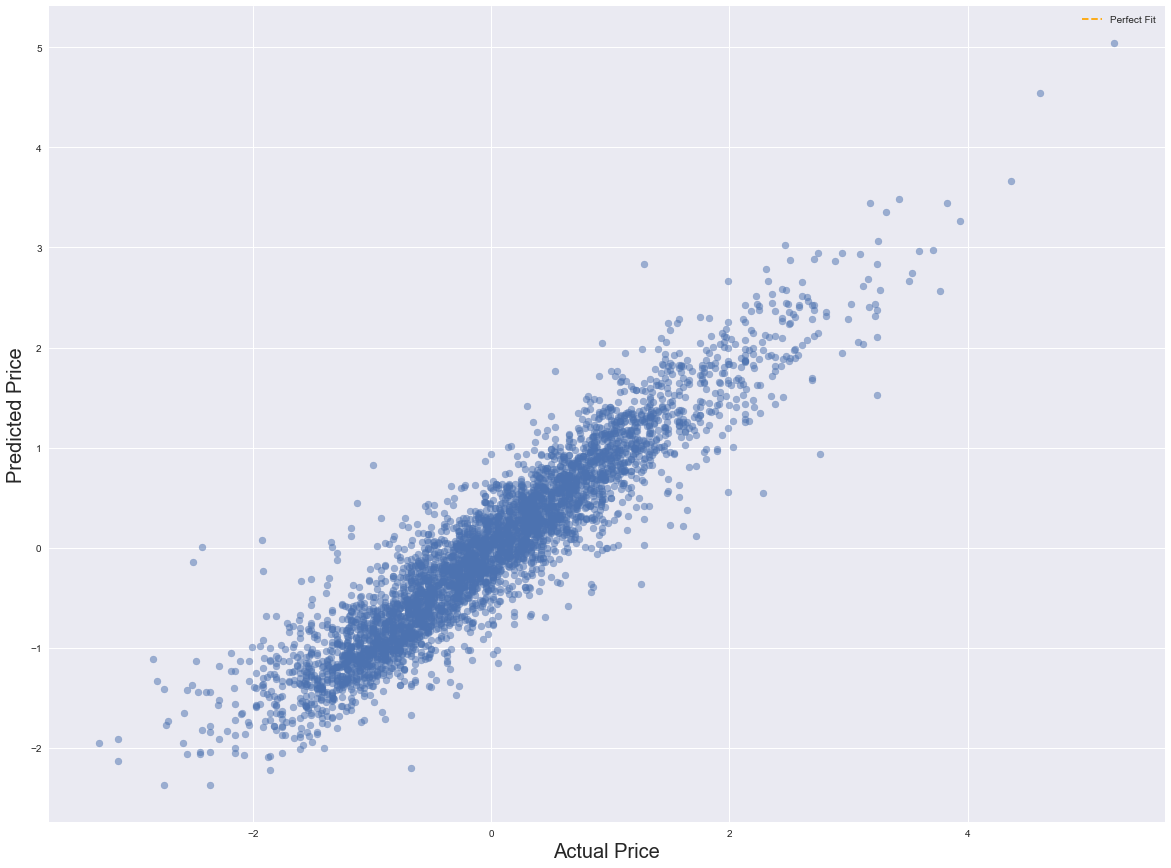

In [94]:
preds = forth_model.predict(X_test_final)
fig, ax = plt.subplots(figsize=(20,15))
perfect_line = np.arange(y_test_scale.min()/100000, y_test_scale.max()/100000)
ax.plot(perfect_line, linestyle="--", color ="orange", label = "Perfect Fit")
ax.scatter(y_test_scale, preds, alpha = 0.5)
ax.set_xlabel("Actual Price",size = 20)
ax.set_ylabel("Predicted Price",size = 20)
ax.legend();

##### Normality
Now let's check whether the normality assumption holds for our model.

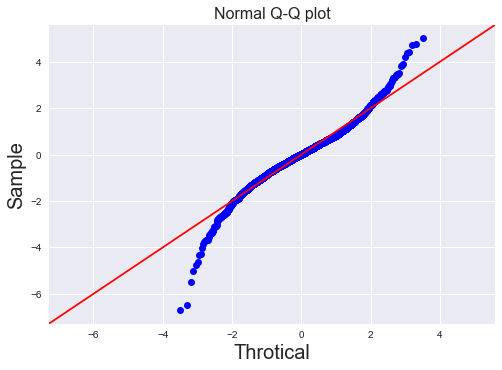

In [95]:
# Imports for data analysis
import scipy.stats as stats
# Set data
residuals = (y_test_scale - preds)
# create the graph
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True )
# set title
plt.title("Normal Q-Q plot", size=16)
# label the axis
plt.xlabel('Throtical', size=20)
plt.ylabel('Sample', size=20)
plt.show();

 We are holding the normality assumption

##### Investigating Multicollinearity (Independence Assumption)
Another way to measure multicollinearity is with variance inflation factor (StatsModels documentation here). A "rule of thumb" for VIF is that 5 is too high (i.e. strong multicollinearity).

Run the code below to find the VIF for each feature.

In [96]:
# import variance_inflation_factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
# the independent variables set
X = X_train_forth_model
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                   for i in range(len(X.columns))]

print(vif_data)

               feature       VIF
0      sqft_living_log  3.705142
1         sqft_lot_log  1.994658
2         bedrooms_log  1.891787
3       waterfront_YES  1.067174
4   grade_11 Excellent  1.252217
..                 ...       ...
71       zipcode_98155  1.119996
72       zipcode_98166  1.082171
73       zipcode_98177  1.070562
74       zipcode_98178  1.088366
75       zipcode_98199  1.097899

[76 rows x 2 columns]


We are below 5 for all features in the final model, so we don't have too high of multicollinearity

##### Homoscedasticity
Now let's check whether the model's errors are indeed homoscedastic or if they violate this principle and display heteroscedasticity.

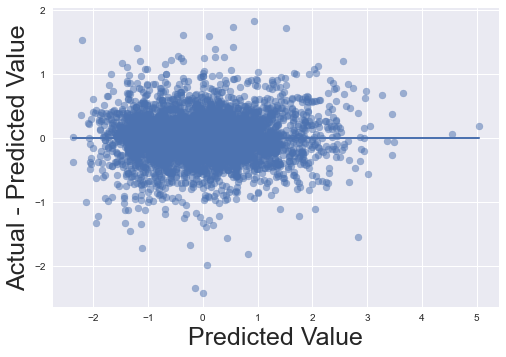

In [97]:
# Creating a figure 
fig, ax = plt.subplots()
# plotting the data
ax.scatter(preds, residuals, alpha=0.5)
ax.plot(preds, [0 for i in range(len(X_test))])
# Adding the labels
ax.set_xlabel("Predicted Value",size = 25)
ax.set_ylabel("Actual - Predicted Value",size = 25);

We are holding Homoscedasticity

#### Interpret the coefficient :

Interpret the coefficient as the percent increase in the dependent variable for every 1% increase in the independent variable.

1.sqft_living_log coefficient = 0.3941
y = b0+b1 x
log (y)= b0+ b1 log(x)
b1= 0.39 
we would say every 1% increase in the independent variable(sqftliving), our dependent variable(price) increases by about 0.39 % when other features still constant.

2.sqft_lot_log coefficient = 0.1136
We would say every 1% increase in the independent variable(sqftlot), our dependent variable(price) increases by about 0.11 % when other features still constant.

3.Waterfront_YES coefficient = 1.3193:
Only the dependent/response variable is log-transformed and independent variable (waterfront_YES ) is catogarical .
We would say every 1% increase in the independent variable(Waterfront), our dependent variable(price) increases by about 1.3 % when other features still constant.

4- Grade_11 Excellent cofficient = 0.2975	
every 1 % increase in the independent variable (grade_11 Excellent) can cause increase the price by 0.2975 %.

5-Grade_12 Luxury cofficient = 0.6021 
every 1 % increase in the independent variableThe (grade_12 Luxury )can increase the price by 0.60 %

6-Grade_13 Mansion cofficient = 1.2258 
every 1 % increase in the independent variableThe ( grade_13 Mansion ) can increase the price by 1.2 %

7-condition_Good cofficient = 0.0702 
every 1 % increase in the independent variable (condition_Good) can increase the price by 0.0702 %

8-condition_Very Good cofficient = 0.19
every 1 % increase in the independent variable(condition_Good) can increase the price by 0.19 %

9-floors_2 cofficient = 0.0358	 
every 1 % increase in the independent variable(floors2) can increase the price by 0.0358 %

10-zipcode_98039 cofficient = 2.360842
every 1 % increase in the independent variable(zipcode_98039) can increase the price by 2.35 %

11-zipcode_98058	0.193034
every 1 % increase in the independent variable(zipcode_98058) can increase the price by .19 %

#### Interpret the Final Model
Below, we will create a data frame containes the feature and its amount of impact to the price
use pd.DataFrame

In [98]:
# create a data frame
forth_model_df = pd.DataFrame(forth_model.coef_,index=X_train_forth_model.columns)
forth_model_df

,0
sqft_living_log,0.394083
sqft_lot_log,0.113608
bedrooms_log,-0.026985
waterfront_YES,1.319336
grade_11 Excellent,0.297470
...,...
zipcode_98155,0.736294
zipcode_98166,0.518768
zipcode_98177,1.119041
zipcode_98178,0.247212


In [99]:
forth_model_df = forth_model_df.sort_values(by = 0 , ascending = [False])
forth_model_df

,0
zipcode_98039,2.360842
zipcode_98004,2.043400
zipcode_98112,1.971851
zipcode_98109,1.911811
zipcode_98119,1.898639
...,...
grade_8 Good,-0.486792
grade_7 Average,-0.702230
grade_6 Low Average,-0.863863
grade_5 Fair,-0.973926


##### Visualization
We will use seaborn and matplotlib libraries to visualize our result

Text(0, 0.5, 'Features')

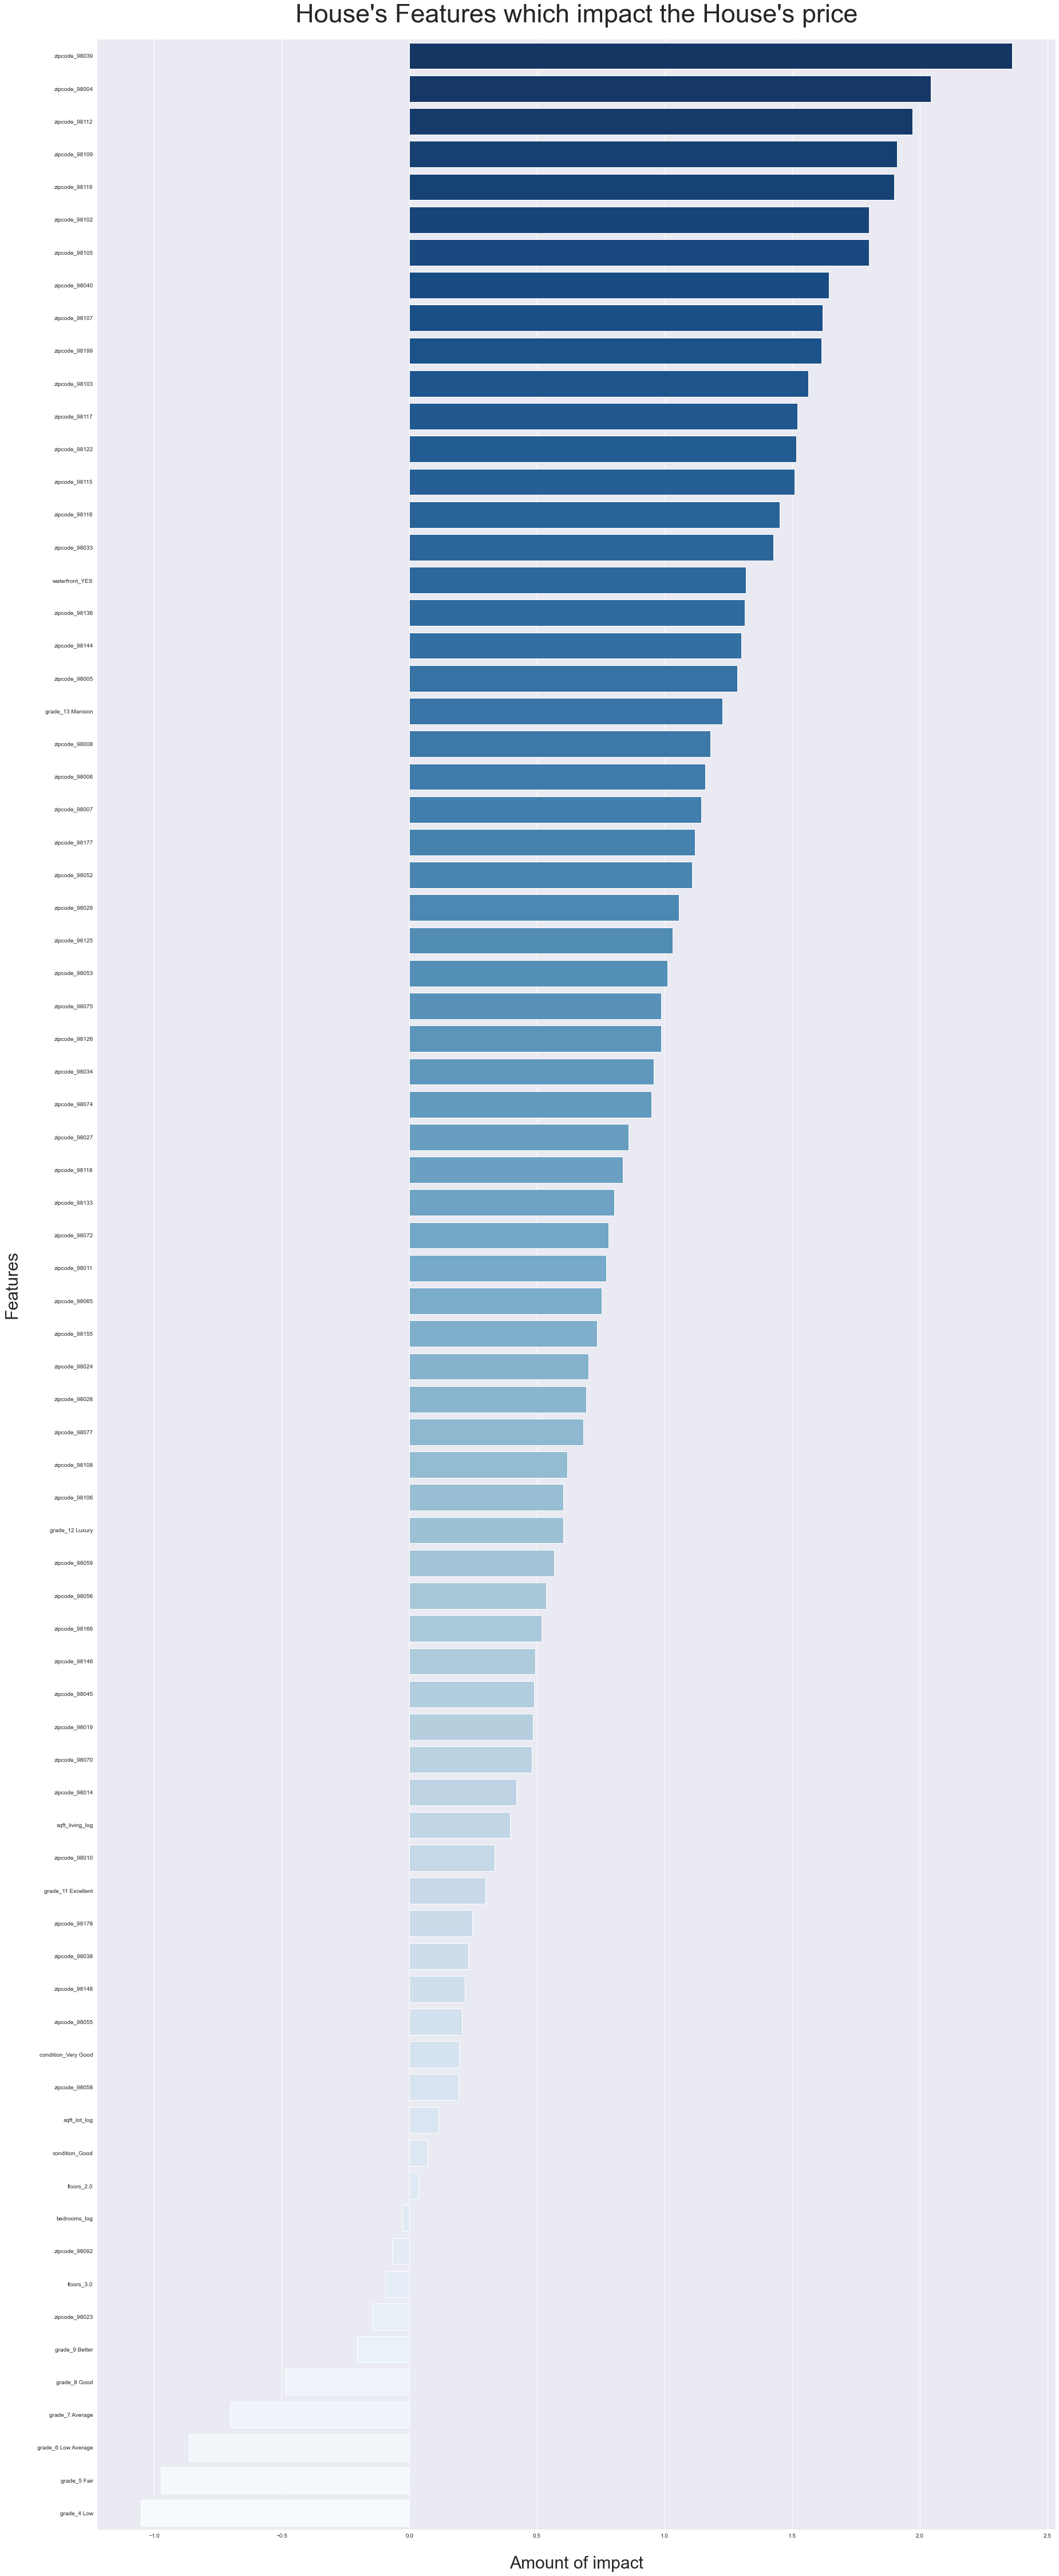

In [100]:
# set the figure size
fig, ax = plt.subplots(figsize=(30,80))
# set the plot style 
sns.set(style = "darkgrid")
# set the font size
sns.set(font_scale = 5)

# Create bars 
data = forth_model_df
sns.barplot(x = forth_model_df[0], y = forth_model_df.index , orient='h',palette="Blues_r")
# Add title and axis names
plt.title("House's Features which impact the House's price",pad=30,fontsize=45)
plt.xlabel('Amount of impact',labelpad=30,fontsize=30 )
plt.ylabel('Features',labelpad=30,fontsize=30)

In [101]:
# initialize data of lists.
data = {'values': [0.6021,0.3941]}
  
# Creates pandas DataFrame.
df = pd.DataFrame(data, index=['grade_12 Luxury',
                               'sqft_living_log'])
  
# print the data
df

,values
grade_12 Luxury,0.6021
sqft_living_log,0.3941


Text(0, 0.5, 'Features')

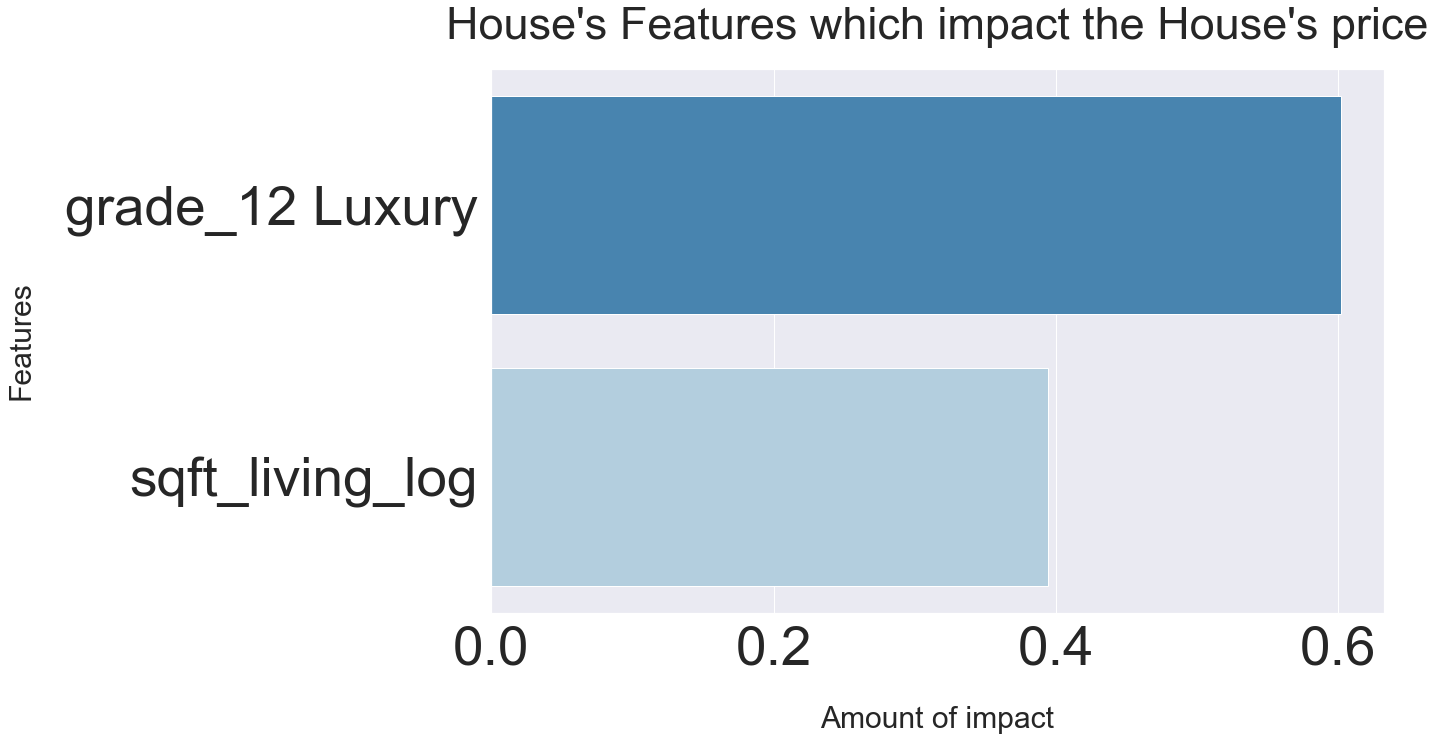

In [102]:
# set the figure size
fig, ax = plt.subplots(figsize=(16,10))
# set the plot style 
sns.set(style = "darkgrid")
# set the font size
sns.set(font_scale = 5)

# Create bars 
data = df
sns.barplot(x = df["values"] , y = df.index ,orient='h',palette="Blues_r")
# Add title and axis names
plt.title("House's Features which impact the House's price",pad=30,fontsize=45)
plt.xlabel('Amount of impact',labelpad=30,fontsize=30 )
plt.ylabel('Features',labelpad=30,fontsize=30)

## Regression Results

1- Our final model explains 87 % of the variation in the data by clarifying the relationship between the price and home features.

2-Based on our model we found that some home features impact home prices positively which means when these features were  provided home values increase as well.

3-The features that increase the price are (ZIP Codes, Homes grades, Waterfront houses, Housing living space, Conditions, and Square footage of the lot).

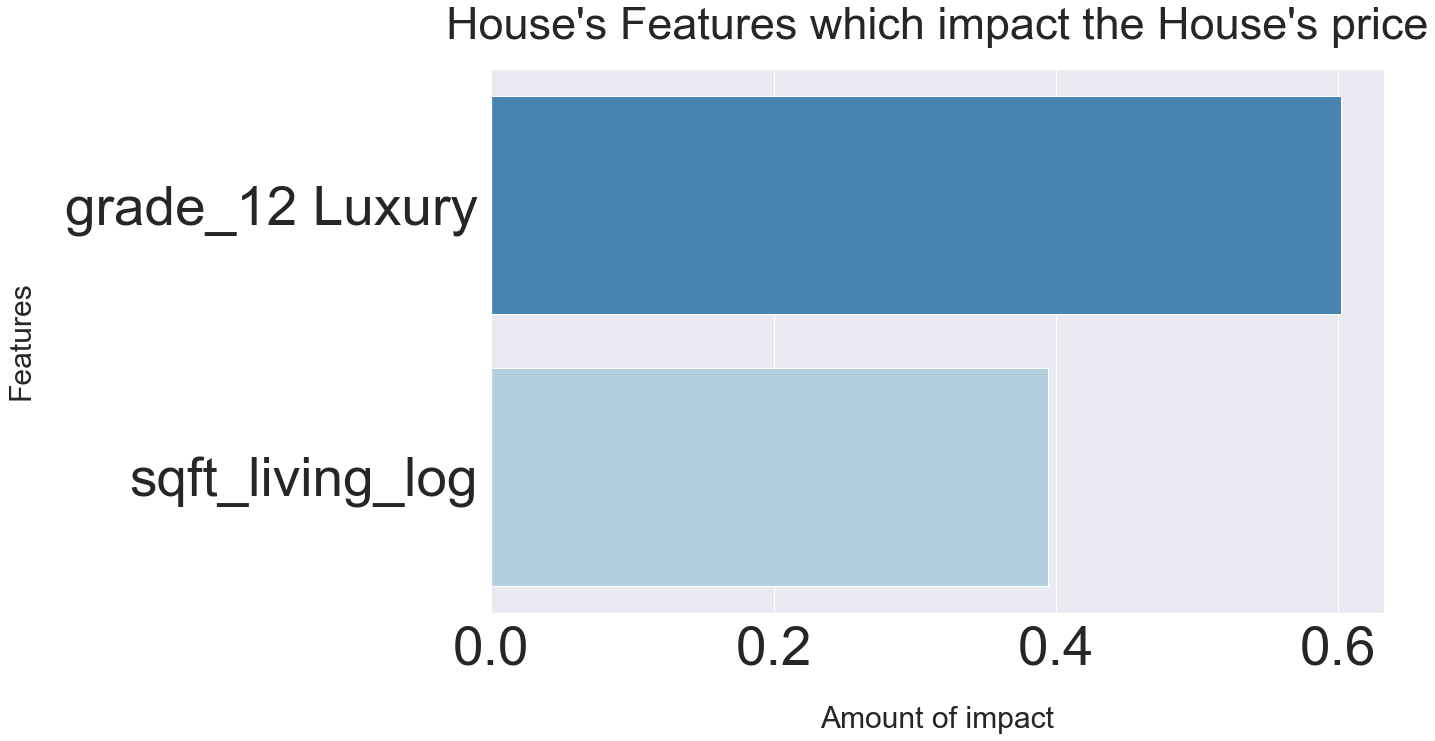

### Conclusions Recommendations

According to our results when homeowners improve some features of their homes, their home values also increase.

We recommended that homeowners should perform enhancement in these areas:

1-Improve the Homes grade :

The grade concept refers to the home architectural design and quality of constraction materials, and workmanship used during the building process.

Some homes are described as luxurious and impressive. This means the house will offer a lot more than basic home functionality, an excess amount of bedrooms and bathrooms, and additional rooms explicitly built for a singular purpose like (theater, gyms, pool, and spa rooms these homes are also made with very high-quality materials.
Quality can be observed, such as solid, level floors, plumb walls, smooth plastered wall/ceiling areas, mitered woodwork joints, and properly fit doors and windows, which are all indications of better quality workmanship.
The Luxury feature can increase the home's price by around 0.60% for every 1% increase in this feature.

2-Improve the Homes living space:
Every 1% increase in sqft living, our price increases by about 0.39 % 
While it’s possible to gain additional living space by adding a new floor a great way to enlarge a bedroom or add new floor space for general use.
adding the second floor can increase the price by around 0.03% for every 1% increase in this feature.





### Next Steps
Further analyses could yield additional insights to further improve the model performance.